In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
sys.path.append('../src/')

sys.path.append('../')
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')


#sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')
from discrete import *
from mock_test import *
#from run_error_analysis import *
#from plot_chain import plot_single, plot_triple, plot_distributions, plot_summary_bar
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from plot_chain import plot_triple, plot_chainwalk

In [4]:
def stack3x3(a=None, b=None, c=None):
    
    A = np.hstack(a)
    B = np.hstack(b)
    C = np.hstack(c)
    #print a[0].shape, A.shape
    return np.vstack([A,B,C])

def stack2x2(a=None, b=None):
    A = np.hstack(a)
    B = np.hstack(b)
    return np.vstack([A,B])

## Initialize Class, Calculate datavector and cov matrices

No Shotnoise, No Finger of God term

In [5]:
cosmo_hj = class_discrete_covariance(KMIN=0.005, KMAX = 10, n=20000, \
                                  RMIN = 6, RMAX = 200, n2 = 194, n_y = 1999, \
                                  b = 2.0, f = 0.74, s=3.5, nn=3.0e-04, \
                                  rscale = 'lin', kscale='lin')

cosmo_hj.mPk_file = '/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/PklinPlanck15.dat'
#cosmo_hj.mPk_file = '/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/output/demo2/matter_power_lin/Plin_z0.55.txt'

In [6]:
p_model0_hj = cosmo_hj.multipole_P(0)
p_model2_hj = cosmo_hj.multipole_P(2)
p_model4_hj = cosmo_hj.multipole_P(4)
xi_model0_hj = cosmo_hj.multipole_Xi(0)
xi_model2_hj = cosmo_hj.multipole_Xi(2)
xi_model4_hj = cosmo_hj.multipole_Xi(4)

In [7]:
"""
 b = galaxy bias
 f = structure growth rate
 s = velocity dispersion in FoG term 
 nn = shot noise 
"""
cosmo = class_discrete_covariance(KMIN=0.001, KMAX = 10, n=20000, \
                                  RMIN = 6, RMAX = 200, n2 = 194, n_y = 200, \
                                  b = 2.0, f = 0.74, s=3.5, nn=3.0e-04, \
                                  rscale = 'lin', kscale='log')

#cosmo.compile_fortran_modules()

# copy class to keep initial setting
#cosmo2 = cosmo
#cosmo2.MatterPower()

# calling matter power spectrum from camb
cosmo.MatterPower()
p_model0 = cosmo.multipole_P(0)
p_model2 = cosmo.multipole_P(2)
p_model4 = cosmo.multipole_P(4)
xi_model0 = cosmo.multipole_Xi(0)
xi_model2 = cosmo.multipole_Xi(2)
xi_model4 = cosmo.multipole_Xi(4)

# calculate covariance matrix
cosmo.RSDband_covariance_PP_all(lmax=4)
cosmo.covariance_Xi_all(lmax=4)
cosmo.covariance_PXi_All(lmax=4)
#cosmo.derivative_P_bfs_all()
#cosmo.derivative_bfs_all()

#covp_model = cosmo.covariance_PP(0,0)     # cov P monopole
#covp_model = cosmo.covariance_PP(2,2)     # cov P monopole
#covp_model = cosmo.covariance_PP(0,0)     # cov P monopole

#covxi_model = cosmo.covariance_Xi(0,0)    # cov Xi monopole  : double bessel FT of covp_model
#covpxi_model = cosmo.covariance_PXi(0,0)  # cov Pxi monopole : FT of covp_model
#covtot_model = np.vstack(( np.hstack((covp_model, covpxi_model )), \
#                          np.hstack((covpxi_model.T, covxi_model )) ))   # cov_combined
#dpdb,_,_ = cosmo.derivative_P_bfs(0)      # dp/db
#dxdb,_,_ = cosmo.derivative_bfs(0)        # dxi/db
#dvdb = np.hstack((dpdb, dxdb))

kscale log
cov_P  : multiprocessing 100 %
cov_Xi  : multiprocessing 100 %
cov_PXi  : multiprocessing 100 %


In [8]:
# /n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong


In [9]:
Hj_k, _, Hj_p0, Hj_p2, Hj_p4 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/pksPl.outputseed42.txt.dat', unpack=True)
Hj_k=Hj_k[1:]
Hj_p0=Hj_p0[1:]
Hj_p2=Hj_p2[1:]
Hj_p4=Hj_p4[1:]


#Hj_xi = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/xis.outputseed42.txt.dat')
Hj_r, _, _, _, Hj_xi0, _, Hj_xi2, _, Hj_xi4 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/corrected_xi/xis.outputsee42.txt.dat', unpack=True, skip_header=7)

#Hj_r, _, _, _, Hj_xi0, _, Hj_xi2, _, Hj_xi4 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/mockdatavectors/Analysis/xis/xis.outputsee142.txt.dat', unpack=True, skip_header=7)
Hj_r_new, Hj_xi0_new, Hj_xi2_new, Hj_xi4_new = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/outputxi_2dpoles1.dat', unpack=True)
Hj_r_old, _, _, Hj_xi0_old, _, Hj_xi2_old, _, Hj_xi4_old = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/xis.outputseed42.txt.dat', unpack=True)

In [222]:
kbin, kstep = np.linspace(0.005, 1.0, 201, retstep=True)
kcenter = kbin[:-1] + kstep/2.
print kcenter

[0.0025 0.0075 0.0125 0.0175 0.0225 0.0275 0.0325 0.0375 0.0425 0.0475
 0.0525 0.0575 0.0625 0.0675 0.0725 0.0775 0.0825 0.0875 0.0925 0.0975
 0.1025 0.1075 0.1125 0.1175 0.1225 0.1275 0.1325 0.1375 0.1425 0.1475
 0.1525 0.1575 0.1625 0.1675 0.1725 0.1775 0.1825 0.1875 0.1925 0.1975
 0.2025 0.2075 0.2125 0.2175 0.2225 0.2275 0.2325 0.2375 0.2425 0.2475
 0.2525 0.2575 0.2625 0.2675 0.2725 0.2775 0.2825 0.2875 0.2925 0.2975
 0.3025 0.3075 0.3125 0.3175 0.3225 0.3275 0.3325 0.3375 0.3425 0.3475
 0.3525 0.3575 0.3625 0.3675 0.3725 0.3775 0.3825 0.3875 0.3925 0.3975
 0.4025 0.4075 0.4125 0.4175 0.4225 0.4275 0.4325 0.4375 0.4425 0.4475
 0.4525 0.4575 0.4625 0.4675 0.4725 0.4775 0.4825 0.4875 0.4925 0.4975
 0.5025 0.5075 0.5125 0.5175 0.5225 0.5275 0.5325 0.5375 0.5425 0.5475
 0.5525 0.5575 0.5625 0.5675 0.5725 0.5775 0.5825 0.5875 0.5925 0.5975
 0.6025 0.6075 0.6125 0.6175 0.6225 0.6275 0.6325 0.6375 0.6425 0.6475
 0.6525 0.6575 0.6625 0.6675 0.6725 0.6775 0.6825 0.6875 0.6925 0.6975
 0.702

In [87]:
HJrmax_new = Hj_r_new[13:101]
HJrmid_new = HJrmax_new-1.0
HJrmin_new = HJrmax_new-2.0

HJxi0_new = Hj_xi0_new[13:101]
HJxi2_new = Hj_xi2_new[13:101]
HJxi4_new = Hj_xi4_new[13:101]

datav_p_HJ = np.hstack([ Hj_p0[:Hj_k.size], Hj_p2[:Hj_k.size], Hj_p4[:Hj_k.size] ])
datav_HJ_paircounts = np.hstack([HJxi0_new[::-1], HJxi2_new[::-1],HJxi4_new[::-1]])

In [88]:
datavector.shape

(6261,)

In [94]:
#kbin2 = np.genfromtxt('../data_txt/Heejong/output_fitting/kcenter.txt')
datavector = np.genfromtxt('../data_txt/Heejong/output_fitting_fourier//chain/datavector.txt')
datavector_HJ = np.genfromtxt('../data_txt/Heejong/output_fitting_pc/datavector_HJ_pc_r24_200.txt')
datav = datavector.copy() 
#np.genfromtxt('../data_txt/Heejong/output_fitting//chain/datavector.txt')
mask = np.genfromtxt('../data_txt/Heejong/output_fitting_fourier//chain/mask.txt')
mask = np.array(mask, dtype='bool')

datav[-datav_HJ_paircounts.size:] = datav_HJ_paircounts
datav[mask] = datav_p_HJ
datav[~mask] = 0.0 #datav_p_HJ
#datav[:datav_HJ_paircounts.size] = datav_p_HJ
#np.savetxt( '../data_txt/Heejong/output_fitting_fourier/datavector_HJ_fourier_r24_200.txt', datav )

In [157]:
pwd

u'/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/notebook'

In [174]:
filenamelist = os.listdir('../data_txt/Heejong/mockdatavectors/Analysis/pksPl/')

In [175]:
filenamelist.sort()

In [176]:
filenamelist

['pksPl.outputsee100.txt.dat',
 'pksPl.outputsee101.txt.dat',
 'pksPl.outputsee102.txt.dat',
 'pksPl.outputsee103.txt.dat',
 'pksPl.outputsee104.txt.dat',
 'pksPl.outputsee105.txt.dat',
 'pksPl.outputsee106.txt.dat',
 'pksPl.outputsee107.txt.dat',
 'pksPl.outputsee108.txt.dat',
 'pksPl.outputsee109.txt.dat',
 'pksPl.outputsee110.txt.dat',
 'pksPl.outputsee111.txt.dat',
 'pksPl.outputsee112.txt.dat',
 'pksPl.outputsee113.txt.dat',
 'pksPl.outputsee114.txt.dat',
 'pksPl.outputsee115.txt.dat',
 'pksPl.outputsee116.txt.dat',
 'pksPl.outputsee117.txt.dat',
 'pksPl.outputsee118.txt.dat',
 'pksPl.outputsee119.txt.dat',
 'pksPl.outputsee120.txt.dat',
 'pksPl.outputsee121.txt.dat',
 'pksPl.outputsee122.txt.dat',
 'pksPl.outputsee123.txt.dat',
 'pksPl.outputsee124.txt.dat',
 'pksPl.outputsee125.txt.dat',
 'pksPl.outputsee126.txt.dat',
 'pksPl.outputsee127.txt.dat',
 'pksPl.outputsee128.txt.dat',
 'pksPl.outputsee129.txt.dat',
 'pksPl.outputsee130.txt.dat',
 'pksPl.outputsee131.txt.dat',
 'pksPl.

In [179]:
def reformatting_datavector(maskfile = '', pdir=None, xdir = None, outdir=''):
    
    mask = np.genfromtxt(maskfile)
    try: os.mkdir(outdir)
    except : pass
    

    if pdir is not None : 
        pfilenamelist = os.listdir(pdir)
        pfilenamelist.sort()
        Ntot = len(pfilenamelist)
  
    if xdir is not None : 
    
        xifilenamelist = os.listdir(xdir)
        xifilenamelist.sort()
        Ntot = len(xifilenamelist)
        
        
        
    for i in range(Ntot):
    
        if pdir is not None : 

            fn = pfilename[i]
            Hj_k, _, Hj_p0, Hj_p2, Hj_p4 = np.genfromtxt(dir+fn, unpack=True)
            Hj_k=Hj_k[1:]
            Hj_p0=Hj_p0[1:]
            Hj_p2=Hj_p2[1:]
            Hj_p4=Hj_p4[1:]

            datav_p_HJ = np.hstack([ Hj_p0[:Hj_k.size], Hj_p2[:Hj_k.size], Hj_p4[:Hj_k.size] ])
            mask[:datav_p_HJ.size] = datav_p_HJ
            
        if xdir is not None : 
            fn = xifilenamelist[i]
            Hj_r,_,_,_,Hj_xi0,_,Hj_xi2,_,Hj_xi4=np.genfromtxt(dir+fn,unpack=True,skip_header=7)
            HJrmin = Hj_r[24:199]
            HJrmid = HJrmin+0.5
            HJrmax = Hj_r[24+1:199+1]
            HJxi0 = Hj_xi0[24:199]
            HJxi2 = Hj_xi2[24:199]
            HJxi4 = Hj_xi4[24:199]
            #datav_HJ = np.hstack([0.5*HJxi0[::-1], 2.5*HJxi2[::-1], 4.5*HJxi4[::-1]])
            datav_HJ = np.hstack([HJxi0[::-1], HJxi2[::-1], HJxi4[::-1]])

            mask[-datav_HJ.size:] = datav_HJ
            #datav[:datav_p_HJ.size] = datav_p_HJ
            
        output_filename = filename.split('.txt')[0]+'k005_r25_200.txt'
        np.savetxt( outdir+output_filename, mask)

        print 'file '+ output_filename + str(i) +'/'+ str(Ntot)+'\r'
        
        rbin = np.column_stack([ HJrmin, HJrmid, HJrmax ])
        np.savetxt( outdir+'rbin.txt', rbin)
        
        kbin = np.column_stack([Hj_k ])
        np.savetxt( outdir+'kbin.txt', kbin)
        
    print 'results stored in ', outdir
              

In [184]:
'xis.see400.dat.txt'.split('.dat.txt')[0]

'xis.see400'

In [152]:
def reformatting_datavector(maskfile = '', dir='', outdir=''):
    
    mask = np.genfromtxt(maskfile)
    
    filenamelist = os.listdir(dir)
    #print filenamelist
    
    try: os.mkdir(outdir)
    except : pass
    
    Ntot = len(filenamelist)
    i=1
    for filename in filenamelist : 
        Hj_r,_,_,_,Hj_xi0,_,Hj_xi2,_,Hj_xi4=np.genfromtxt(dir+filename,unpack=True,skip_header=7)
        HJrmin = Hj_r[24:199]
        HJrmid = HJrmin+0.5
        HJrmax = Hj_r[24+1:199+1]
        HJxi0 = Hj_xi0[24:199]
        HJxi2 = Hj_xi2[24:199]
        HJxi4 = Hj_xi4[24:199]
        #datav_HJ = np.hstack([0.5*HJxi0[::-1], 2.5*HJxi2[::-1], 4.5*HJxi4[::-1]])
        datav_HJ = np.hstack([HJxi0[::-1], HJxi2[::-1], HJxi4[::-1]])

        mask[-datav_HJ.size:] = datav_HJ
        #datav[:datav_p_HJ.size] = datav_p_HJ

        
        
        output_filename = filename.split('.txt')[0]+'_r25_200.txt'
        np.savetxt( outdir+output_filename, mask)
        
        print 'file '+ str(i) +'/'+ str(Ntot)+'\r'
        i+=1
        
    rbin = np.column_stack([ HJrmin, HJrmid, HJrmax ])
    np.savetxt( outdir+'rbin.txt', rbin)
    print 'results stored in ', outdir
              

In [153]:
reformatting_datavector(
        maskfile = '/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/output_fitting/datavector_HJ_r25_200.txt',
        dir='/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/corrected_xi/',
        outdir = '/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/out_corrected_xi/')

file 1/1
results stored in  /n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/out_corrected_xi/


In [112]:
os.listdir('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/Heejong/mockdatavectors/Analysis/xis/')

['xis.outputsee100.txt.dat',
 'xis.outputsee601.txt.dat',
 'xis.outputsee101.txt.dat',
 'xis.outputsee602.txt.dat',
 'xis.outputsee102.txt.dat',
 'xis.outputsee603.txt.dat',
 'xis.outputsee103.txt.dat',
 'xis.outputsee604.txt.dat',
 'xis.outputsee104.txt.dat',
 'xis.outputsee605.txt.dat',
 'xis.outputsee105.txt.dat',
 'xis.outputsee606.txt.dat',
 'xis.outputsee106.txt.dat',
 'xis.outputsee607.txt.dat',
 'xis.outputsee107.txt.dat',
 'xis.outputsee608.txt.dat',
 'xis.outputsee108.txt.dat',
 'xis.outputsee609.txt.dat',
 'xis.outputsee109.txt.dat',
 'xis.outputsee610.txt.dat',
 'xis.outputsee110.txt.dat',
 'xis.outputsee611.txt.dat',
 'xis.outputsee111.txt.dat',
 'xis.outputsee612.txt.dat',
 'xis.outputsee112.txt.dat',
 'xis.outputsee613.txt.dat',
 'xis.outputsee113.txt.dat',
 'xis.outputsee614.txt.dat',
 'xis.outputsee114.txt.dat',
 'xis.outputsee615.txt.dat',
 'xis.outputsee115.txt.dat',
 'xis.outputsee616.txt.dat',
 'xis.outputsee116.txt.dat',
 'xis.outputsee617.txt.dat',
 'xis.outputse

In [107]:
'filename.txt.dat'.split('.txt')[0]

'filename'

In [61]:
HJrmin = Hj_r[19:194]
HJrmid = HJrmin + 0.5
HJrmax = Hj_r[1+19:195]
HJxi0 = Hj_xi0[19:194]
HJxi2 = Hj_xi2[19:194]
HJxi4 = Hj_xi4[19:194]
datav_HJ = np.hstack([0.5*HJxi0[::-1], 2.5*HJxi2[::-1], 4.5*HJxi4[::-1]])

In [352]:
kbin2 = np.genfromtxt('../data_txt/Heejong/output_fitting/kcenter.txt')
datavector = np.genfromtxt('../data_txt/Heejong/output_fitting//chain/datavector.txt')
datavector_HJ = np.genfromtxt('../data_txt/Heejong/output_fitting/datavector_HJ_r25_200.txt')
datav = datavector.copy() 
#np.genfromtxt('../data_txt/Heejong/output_fitting//chain/datavector.txt')
mask = np.genfromtxt('../data_txt/Heejong/output_fitting//chain/mask.txt')
mask = np.array(mask, dtype='bool')

In [350]:
datav[-datav_HJ.size:] = datav_HJ
datav[:datav_p_HJ.size] = datav_p_HJ
np.savetxt( '../data_txt/Heejong/output_fitting/datavector_HJ_r25_200.txt', datav )

In [319]:
kbin2.shape

(201,)

(-100, 200)

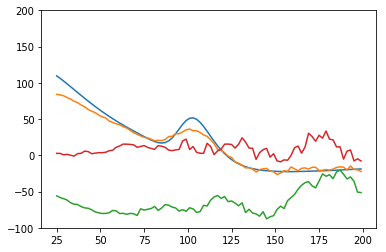

In [419]:
fig, ax = plt.subplots()
#ax.plot(HJrmid, HJrmid**2*datavector[mask][:HJrmid.size][::-1])
ax.plot(HJrmid_new, HJrmid_new**2*datavector[mask][:HJrmid_new.size][::-1])

#ax.plot(HJrmid, HJrmid**2*datavector[mask][HJrmid.size:HJrmid.size*2][::-1])
#ax.plot(HJrmid, HJrmid**2*datavector[mask][-HJrmid.size:][::-1])


#ax.plot(HJrmid_new, HJrmid_new**2*datavector_HJ[mask][:HJrmid_new.size][::-1])
#ax.plot(HJrmid, HJrmid**2*datavector_HJ[mask][HJrmid.size:HJrmid.size*2][::-1])
#ax.plot(HJrmid, HJrmid**2*datavector_HJ[mask][-HJrmid.size:][::-1])

ax.plot(HJrmid_new, HJrmid_new**2*HJxi0_new)
ax.plot(HJrmid_new, HJrmid_new**2*HJxi2_new)
ax.plot(HJrmid_new, HJrmid_new**2*HJxi4_new)

#ax.plot(Hj_r_new, Hj_r_new**2*datav[mask][Hj_r_new.size:Hj_r_new.size*2][::-1])
#ax.plot(Hj_r_new, Hj_r_new**2*datav[mask][-1*Hj_r_new.size:][::-1])
#ax.plot(Hj_r_new, Hj_r_new**2*datav[mask][:Hj_r_new.size])

ax.set_ylim(-100,200)

In [101]:
datavector[mask][:Hj_k.size].size, cosmo_hj.kcenter_y.size

(278, 1999)

(10, 100000.0)

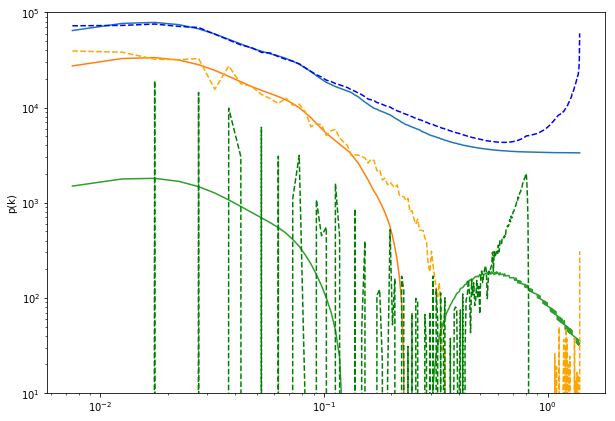

In [110]:
fig, ax = plt.subplots(figsize = (10,7))
#ax.loglog(cosmo.kcenter_y, p_mock0[0], '.')

#ax.errorbar(cosmo.kcenter_y, p_model0 + 1./cosmo.nn, yerr=np.sqrt(covp00.diagonal()), alpha = 0.1)
#ax.errorbar(cosmo.kcenter_y, p_model2, yerr=np.sqrt(covp22.diagonal()), alpha = 0.1)
#ax.errorbar(cosmo.kcenter_y, p_model4, yerr=np.sqrt(covp44.diagonal()), alpha = 0.1)

#ax.loglog(cosmo_hj.kcenter_y, p_model0_hj + 1./cosmo_hj.nn, color = 'blue')
#ax.loglog(cosmo_hj.kcenter_y, p_model2_hj, color = 'orange')
#ax.loglog(cosmo_hj.kcenter_y, p_model4_hj, color = 'green')

ax.loglog(Hj_k, datavector[mask][:Hj_k.size])
ax.loglog(Hj_k, datavector[mask][Hj_k.size:2*Hj_k.size])
ax.loglog(Hj_k, datavector[mask][2*Hj_k.size:])

ax.loglog(Hj_k, Hj_p0, color = 'blue', ls = '--')
ax.loglog(Hj_k, Hj_p2, color = 'orange', ls = '--')
ax.loglog(Hj_k, Hj_p4, color = 'green', ls = '--')


#ax.set_yscale('linear')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('p(k)')
ax.set_ylim(10, 1e+05)



(10, 100000.0)

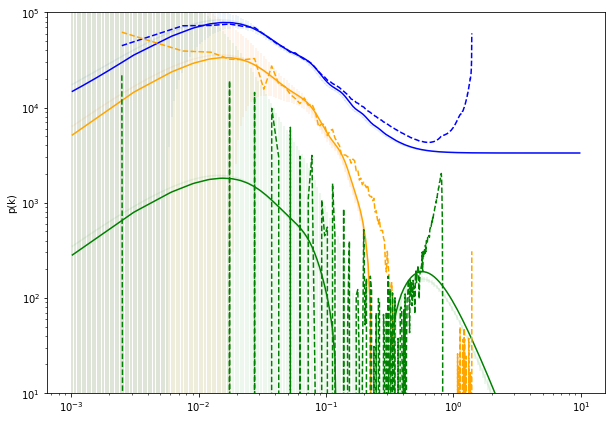

In [165]:
fig, ax = plt.subplots(figsize = (10,7))
#ax.loglog(cosmo.kcenter_y, p_mock0[0], '.')

ax.errorbar(cosmo.kcenter_y, p_model0 + 1./cosmo.nn, yerr=np.sqrt(covp00.diagonal()), alpha = 0.1)
ax.errorbar(cosmo.kcenter_y, p_model2, yerr=np.sqrt(covp22.diagonal()), alpha = 0.1)
ax.errorbar(cosmo.kcenter_y, p_model4, yerr=np.sqrt(covp44.diagonal()), alpha = 0.1)

ax.loglog(cosmo_hj.kcenter_y, p_model0_hj + 1./cosmo.nn, color = 'blue')
ax.loglog(cosmo_hj.kcenter_y, p_model2_hj, color = 'orange')
ax.loglog(cosmo_hj.kcenter_y, p_model4_hj, color = 'green')


ax.loglog(Hj_k, Hj_p0, color = 'blue', ls = '--')
ax.loglog(Hj_k, Hj_p2, color = 'orange', ls = '--')
ax.loglog(Hj_k, Hj_p4, color = 'green', ls = '--')


#ax.set_yscale('linear')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('p(k)')
ax.set_ylim(10, 1e+05)


In [136]:
Hj_r.shape, Hj_xi0.shape

((1729,), (200,))

In [151]:
Hj_r_new.shape, Hj_r.shape

((200,), (1729,))

In [152]:
from scipy.interpolate import interp1d

In [68]:
Hj_xi0

array([1., 0., 0., ..., 0., 1., 0.])

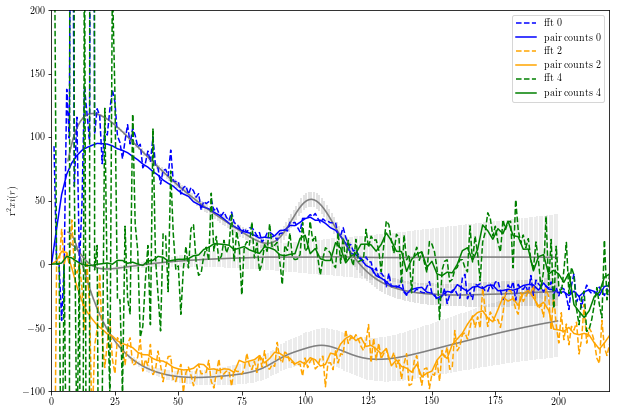

In [105]:
mfactor = 0.5

fig, ax = plt.subplots(figsize = (10,7))


ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model0_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi00.diagonal()), alpha=0.3,  color = 'grey')
ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model2_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi22.diagonal()), alpha=0.2, color = 'grey')
ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model4_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi44.diagonal()), alpha=0.2, color = 'grey')

ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model0_hj, color = 'grey')
ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model2_hj, color = 'grey')
ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model4_hj, color = 'grey')


#Hj_r = Hj_xi[:,0]-0.5
ax.plot(Hj_r, Hj_r**2*Hj_xi0, color = 'blue', ls='--', label='fft 0')
ax.plot(Hj_r_new, Hj_r_new**2*Hj_xi0_new, color = 'blue', ls='-', label='pair counts 0')

ax.plot(Hj_r, Hj_r**2*Hj_xi2, color = 'orange', ls='--', label='fft 2')
ax.plot(Hj_r_new, Hj_r_new**2*Hj_xi2_new, color = 'orange', ls='-', label='pair counts 2')

ax.plot(Hj_r, Hj_r**2*Hj_xi4, color = 'green', ls='--', label='fft 4')
ax.plot(Hj_r_new, Hj_r_new**2*Hj_xi4_new, color = 'green', ls='-', label='pair counts 4')

ax.set_ylabel('r^2 xi(r)')
ax.set_ylim(-100,200)
ax.set_xlim(0,220)

ax.legend()

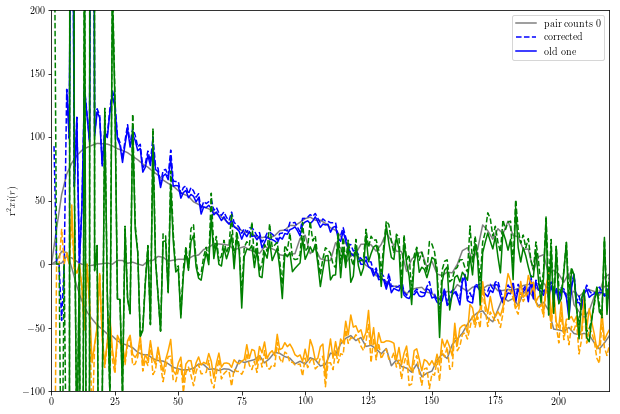

In [201]:
mfactor = 0.5

fig, ax = plt.subplots(figsize = (10,7))

"""
ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model0_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi00.diagonal()), alpha=0.3,  color = 'grey')
ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model2_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi22.diagonal()), alpha=0.2, color = 'grey')
ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model4_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi44.diagonal()), alpha=0.2, color = 'grey')


ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model0_hj, color = 'grey')
ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model2_hj, color = 'grey')
ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model4_hj, color = 'grey')
"""

ax.plot(Hj_r_new, Hj_r_new**2*Hj_xi0_new, color = 'grey', ls='-', label='pair counts 0')
ax.plot(Hj_r_new, Hj_r_new**2*Hj_xi2_new, color = 'grey', ls='-', label='')
ax.plot(Hj_r_new, Hj_r_new**2*Hj_xi4_new, color = 'grey', ls='-', label='')


#Hj_r = Hj_xi[:,0]-0.5
ax.plot(Hj_r, Hj_r**2*Hj_xi0, color = 'blue', ls='--', label='corrected')
ax.plot(Hj_r_old, 0.5*Hj_r_old**2*Hj_xi0_old, color = 'blue', ls='-', label='old one')

ax.plot(Hj_r, Hj_r**2*Hj_xi2, color = 'orange', ls='--', label='')
ax.plot(Hj_r_old, 2.5*Hj_r_old**2*Hj_xi2_old, color = 'orange', ls='-', label='')

ax.plot(Hj_r, Hj_r**2*Hj_xi4, color = 'green', ls='--', label='')
ax.plot(Hj_r_old, 4.5*Hj_r_old**2*Hj_xi4_old, color = 'green', ls='-', label='')

ax.set_ylabel('r^2 xi(r)')
ax.set_ylim(-100,200)
ax.set_xlim(0,220)

ax.legend()

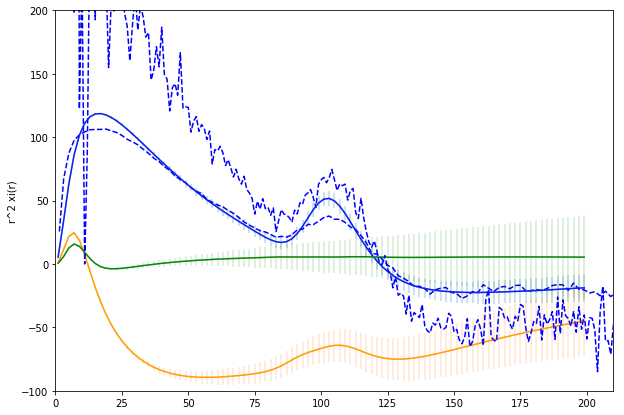

In [144]:
mfactor = 0.5

fig, ax = plt.subplots(figsize = (10,7))

ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model0_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi00.diagonal()), alpha=0.3)
ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model2_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi22.diagonal()), alpha=0.2)
ax.errorbar(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model4_hj, yerr=cosmo_hj.rcenter**2*np.sqrt(covxi44.diagonal()), alpha=0.2)

ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model0_hj, color = 'blue')
ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model2_hj, color = 'orange')
ax.plot(cosmo_hj.rcenter, cosmo_hj.rcenter**2*xi_model4_hj, color = 'green')

#Hj_r = Hj_xi[:,0]-0.5
ax.plot(Hj_r, Hj_r**2*Hj_xi0, color = 'blue', ls='--')
ax.plot(Hj_r_new, Hj_r_new**2*Hj_xi0_new, color = 'blue', ls='--')
#ax.plot(Hj_r, Hj_r**2*Hj_xi[:,4], color = 'orange')
#ax.plot(Hj_r, Hj_r**2*2.5*Hj_xi[:,5], color = 'orange', ls='--', label = '5/2')
#ax.plot(Hj_r, Hj_r**2*Hj_xi[:,7], color = 'green', ls = '--')



ax.set_ylabel('r^2 xi(r)')
ax.set_ylim(-100,200)
ax.set_xlim(0,210)

ax.legend()


In [148]:
import fitsio

fits = fitsio.read('../data_txt/Heejong/output_fitting_mock_rmin50/xis//output_bfsn_ell02_k005_01_r50_200.fits')
err_b, err_f, err_s, err_n = fits['sigma_params_Xi_direct']
#err_b, err_f = fits['sigma_params_Xi_direct']
cov_fft = fits['cov_params_Xi_direct']
cov_tot = fits['cov_params_tot_direct']
cov_diff = fits['cov_params_diff_direct']
cov_f1 = fits['cov_params_p_direct']

#../data_txt/Heejong/output_fitting_mock_rmin50/xis/fmin/fmin_bfsn_ell02_k005_01_r50_200.txt
bestfit_b, bestfit_f, bestfit_s, bestfit_n, _ = np.genfromtxt('../data_txt/Heejong/output_fitting_mock_rmin50/xis/fmin/fmin_bfsn_ell02_k005_01_r50_200.txt', unpack=True)
bestfit_b_f1, bestfit_f_f1, bestfit_s_f1, bestfit_n_f1, _ = np.genfromtxt('../data_txt/Heejong/output_fitting_fourier/fmin/fmin_bfsn_ell02_k005_01.txt', unpack=True)

#bestfit_b, bestfit_f, bestfit_s, bestfit_n, _ = np.genfromtxt('../data_txt/Heejong/output_fitting/fmin/fmin_bfsn_ell02_r25_200.txt', unpack=True)

fits_pc = fitsio.read('../data_txt/Heejong/output_fitting_pc_r50_200/output_bfsn_ell02_r50_200.fits')
err_b_pc, err_f_pc,err_s_pc, err_n_pc = fits_pc['sigma_params_Xi_direct']
cov_pc = fits['cov_params_Xi_direct']
bestfit_b_pc, bestfit_f_pc, bestfit_s_pc, bestfit_n_pc, _ = np.genfromtxt('../data_txt/Heejong/output_fitting_pc_r50_200/fmin/fmin_bfsn_ell02_r50_200.txt', unpack=True)


fits_f3 = fitsio.read('../data_txt/Heejong/output_fitting_fourier/output_bfsn_ell02_k005_03.fits')
err_b_f3, err_f_f3, err_s_f3, err_n_f3 = fits_f3['sigma_params_p_direct']
cov_f3 = fits_f3['cov_params_p_direct']
bestfit_b_f3, bestfit_f_f3, bestfit_s_f3, bestfit_n_f3, _ = np.genfromtxt('../data_txt/Heejong/output_fitting_fourier/fmin/fmin_bfsn_ell02_k005_03.txt', unpack=True)


In [157]:
mask_xi = np.genfromtxt('../data_txt/Heejong/output_fitting_mock_rmin50/xis/chain/mask.txt')
mask_p = np.genfromtxt('../data_txt/Heejong/output_fitting_fourier/chain/mask.txt')

In [158]:
np.sum(mask_xi), np.sum(mask_p)

(300.0, 118.0)

In [154]:
err_tot = fits['sigma_params_tot_direct']
err_diff = fits['sigma_params_diff_direct']
print'combined sigma =', err_tot
print 'diff sigma =', err_diff

combined sigma = [1.97264935e-02 3.61503889e-02 3.85806949e-01 2.62353146e-05]
diff sigma = [2.17005505e-02 2.99035132e-02 4.85023723e-01 3.76607460e-05]


In [62]:
fits_f2 = fitsio.read('../data_txt/Heejong/output_fitting_fourier/output_bfsn_ell02_k005_02.fits')
err_b_f2, err_f_f2, err_s_f2, err_n_f2 = fits_f2['sigma_params_p_direct']
cov_f2 = fits_f2['cov_params_p_direct']
bestfit_b_f2, bestfit_f_f2, bestfit_s_f2, bestfit_n_f2, _ = np.genfromtxt('../data_txt/Heejong/output_fitting_fourier/fmin/fmin_bfsn_ell02_k005_02.txt', unpack=True)


In [63]:
#fits_f1 = fitsio.read('../data_txt/Heejong/output_fitting_fourier/output_bfsn_ell02_k005_01.fits')
#err_b_f1, err_f_f1, err_s_f1, err_n_f1 = fits_f1['sigma_params_p_direct']
#cov_f1 = fits_f1['cov_params_p_direct']


In [64]:
chain_fft = np.random.multivariate_normal([bestfit_b, bestfit_f, bestfit_s, bestfit_n], cov_fft, size = 500000)
chain_pc = np.random.multivariate_normal([bestfit_b_pc, bestfit_f_pc, bestfit_s_pc, bestfit_n_pc], cov_pc, size = 500000)
#chain_f3 = np.random.multivariate_normal([bestfit_b_f3, bestfit_f_f3, bestfit_s_f3, bestfit_n_f3], cov_f3, size = 500000)
#chain_f2 = np.random.multivariate_normal([bestfit_b_f2, bestfit_f_f2, bestfit_s_f2, bestfit_n_f2], cov_f2, size = 500000)
chain_f1 = np.random.multivariate_normal([bestfit_b_f1, bestfit_f_f1, bestfit_s_f1, bestfit_n_f1], cov_f1, size = 500000)

In [65]:
print cov_f1.diagonal()
print cov_f2.diagonal()
print cov_f3.diagonal()

[9.17863629e-04 3.16152356e-03 7.72576738e-01 2.59268760e-09]
[9.93107725e-05 5.04177600e-04 1.05835645e-02 3.74650198e-11]
[3.37872310e-05 2.31473576e-04 1.63188475e-03 3.45612039e-12]


plot save to  test.png


(<chainconsumer.chainconsumer.ChainConsumer at 0x7f9496e23310>,
 <matplotlib.figure.Figure at 0x7f9496c7a350>)

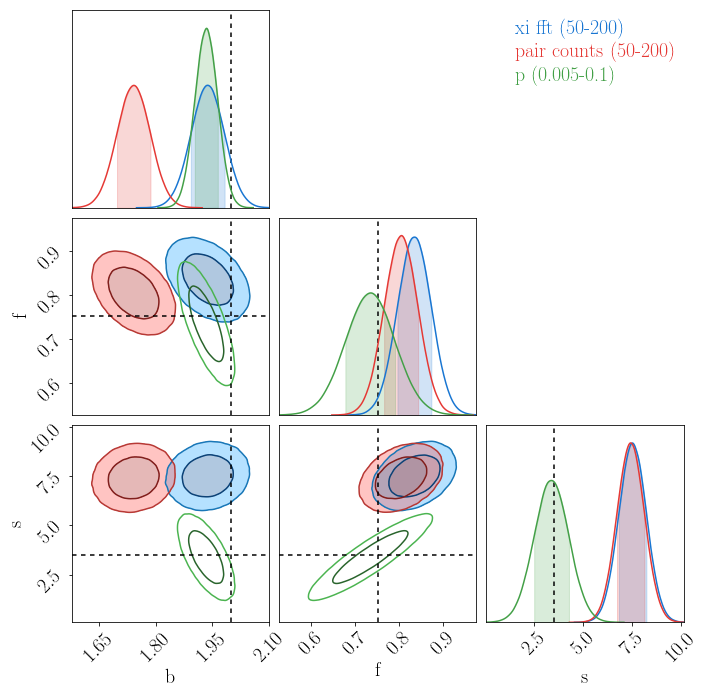

In [159]:
params = ['b', 'f', 's', 'n']
values = [2, 0.752, 3.5, 0.0003]
figname = 'test.png'

plot_triple([chain_fft, chain_pc, chain_f1], \
            [params, params, params, params, params],\
            values, figname,\
            linewidths = [1.5,1.5,1.5,1.5, 1.5],
            shade = [0.05, 0.05, 0, 0,0],
            kde = [False, False,False,False,False],
            colors = ['blue', 'red', 'green', 'black', 'purple'],           
            chain_names=['xi fft (50-200)', 'pair counts (50-200)', 'p (0.005-0.1)', 'p (0.005-0.2)', 'p (0.005-0.3)'],\
            figsize = (10,10),
            keep=[0,1,2]
            #keep = [0,1,5,6,7,9,10,11,12,13,14]
            )
            #keep = [0,1,2,3,4,5,6,7,9])

plot save to  test.png


(<chainconsumer.chainconsumer.ChainConsumer at 0x7f9496c32310>,
 <matplotlib.figure.Figure at 0x7f94929a8d50>)

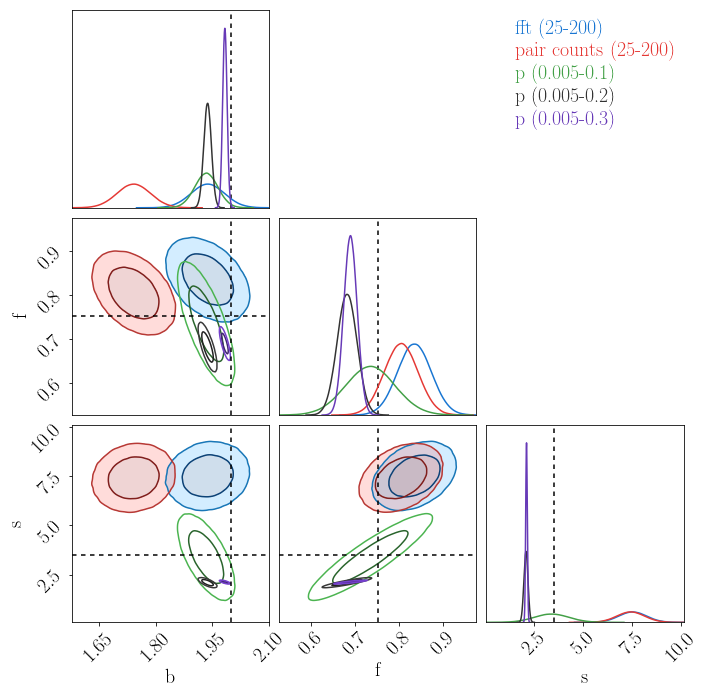

In [160]:
params = ['b', 'f', 's', 'n']
values = [2, 0.752, 3.5, 0.0003]
figname = 'test.png'

plot_triple([chain_fft, chain_pc, chain_f1, chain_f2, chain_f3], \
            [params, params, params, params, params],\
            values, figname,\
            linewidths = [1.5,1.5,1.5,1.5, 1.5],
            shade = [0.05, 0.05, 0, 0,0],
            kde = [False, False,False,False,False],
            colors = ['blue', 'red', 'green', 'black', 'purple'],           
            chain_names=['fft (25-200)', 'pair counts (25-200)', 'p (0.005-0.1)', 'p (0.005-0.2)', 'p (0.005-0.3)'],\
            figsize = (10,10),
            keep=[0,1,2]
            #keep = [0,1,5,6,7,9,10,11,12,13,14]
            )
            #keep = [0,1,2,3,4,5,6,7,9])

# Mock bestfit params 

In [80]:
bestfit_params_p = []
mockdirp = '../data_txt/Heejong/output_fitting_mock/ps/fmin/'
filenames_p = os.listdir( mockdirp )
filenames_p.sort()

mockdirxi = '../data_txt/Heejong/output_fitting_mock_rmin50//xis/fmin/'
filenames_xi_fft = os.listdir(mockdirxi)
filenames_xi_fft.sort()


In [81]:

bestparams_p = []
bestparams_xi = []
for fp, fx in zip(filenames_p, filenames_xi_fft) :
    bestparams_p.append(np.genfromtxt(mockdirp + fp ))
    bestparams_xi.append(np.genfromtxt(mockdirxi + fx) )
bestparams_p = np.array(bestparams_p)[:, :-1]
bestparams_xi = np.array(bestparams_xi)[:, :-1]


In [123]:
dic_results = combine_sigma( bestparams_p, bestparams_xi, re=False)

317/317                
sigma_p       : [2.31106213e-02 2.95632172e-02 3.71437784e-01 1.59754420e-05]
sigma_xi      : [7.23236569e-02 6.58888952e-02 1.47504490e+00 2.35764903e-04]
sigma_combin  : [2.16390664e-02 2.64510391e-02 3.45289227e-01 1.52130862e-05]
sigma_diff    : [2.17591917e-02 2.64556723e-02 3.39683921e-01 1.52042339e-05]


In [124]:
bestfit_fft_measured = dic_results['mean_Xi']
bestfit_p_measured = dic_results['mean_p']
bestfit_tot_measured = dic_results['mean_tot']

In [146]:
cov_fft_measured =  dic_results['cov_params_Xi_direct']
cov_p_measured = dic_results['cov_params_p_direct']
cov_tot_measured = dic_results['cov_params_tot_direct']
cov_diff_measured = dic_results['cov_params_diff_direct']

In [126]:
cov_tot_measured.shape, bestfit_tot_measured.shape

((4, 4), (4,))

In [147]:
chain_fft_measured = np.random.multivariate_normal( bestfit_fft_measured, cov_fft_measured, size = 500000)
chain_pc_measured = np.random.multivariate_normal([bestfit_b_pc, bestfit_f_pc, bestfit_s_pc, bestfit_n_pc], cov_pc, size = 500000)
chain_f1_measured = np.random.multivariate_normal(bestfit_p_measured, cov_p_measured, size = 500000)
chain_tot_measured = np.random.multivariate_normal(bestfit_tot_measured, cov_tot_measured, size = 500000)
chain_diff_measured = np.random.multivariate_normal(bestfit_tot_measured, cov_diff_measured, size = 500000)


plot save to  test.png


(<chainconsumer.chainconsumer.ChainConsumer at 0x7f9492a99150>,
 <matplotlib.figure.Figure at 0x7f948fd596d0>)

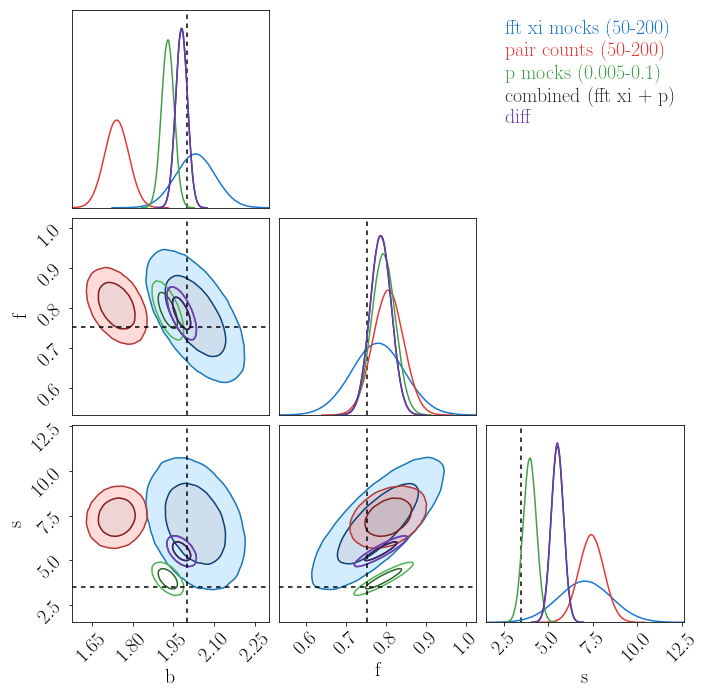

In [161]:
params = ['b', 'f', 's', 'n']
values = [2, 0.752, 3.5, 0.0003]
figname = 'test.png'

plot_triple([chain_fft_measured, chain_pc_measured, chain_f1_measured, chain_tot_measured, chain_diff_measured  ], \
            [params, params, params, params, params],\
            values, figname,\
            linewidths = [1.5,1.5,1.5,1.5, 1.5],
            shade = [0.05, 0.05, 0, 0,0],
            kde = [False, False,False,False,False],
            colors = ['blue', 'red', 'green', 'black', 'purple'],           
            chain_names=['fft xi mocks (50-200)', 'pair counts (50-200)', 'p mocks (0.005-0.1)','combined (fft xi + p)', 'diff'],\
            figsize = (10,10),
            keep=[0,1,2]
            #keep = [0,1,5,6,7,9,10,11,12,13,14]
            )
            #keep = [0,1,2,3,4,5,6,7,9])

In [150]:
chain_fft_fisher = np.random.multivariate_normal( bestfit_fft_measured, cov_fft, size = 500000)
chain_pc_fisher = np.random.multivariate_normal([bestfit_b_pc, bestfit_f_pc, bestfit_s_pc, bestfit_n_pc], cov_pc, size = 500000)
chain_f1_fisher = np.random.multivariate_normal(bestfit_p_measured, cov_f1, size = 500000)
chain_tot_fisher = np.random.multivariate_normal(bestfit_tot_measured, cov_tot, size = 500000)
chain_diff_fisher = np.random.multivariate_normal(bestfit_tot_measured, cov_diff, size = 500000)

plot save to  test.png


(<chainconsumer.chainconsumer.ChainConsumer at 0x7f9490267c10>,
 <matplotlib.figure.Figure at 0x7f948c96ab90>)

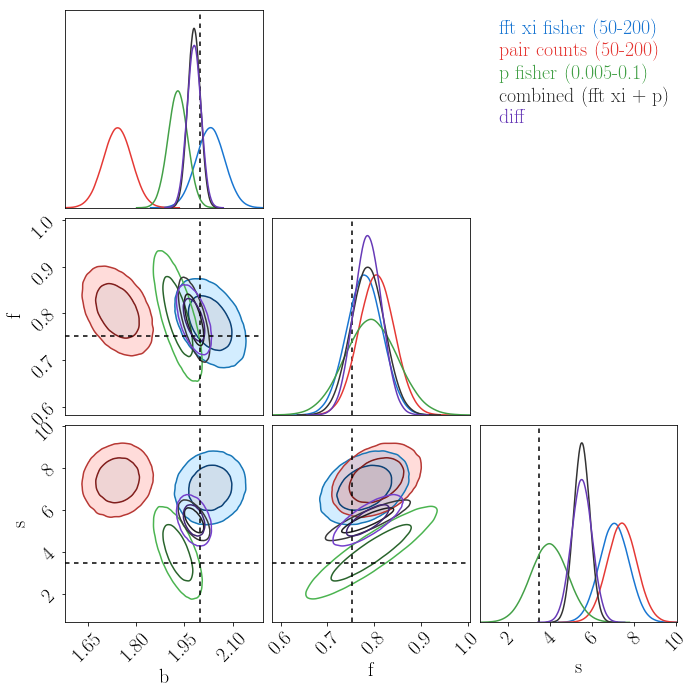

In [162]:
params = ['b', 'f', 's', 'n']
values = [2, 0.752, 3.5, 0.0003]
figname = 'test.png'

plot_triple([chain_fft_fisher, chain_pc_fisher, chain_f1_fisher, chain_tot_fisher, chain_diff_fisher ], \
            [params, params, params, params, params],\
            values, figname,\
            linewidths = [1.5,1.5,1.5,1.5, 1.5],
            shade = [0.05, 0.05, 0, 0,0],
            kde = [False, False,False,False,False],
            colors = ['blue', 'red', 'green', 'black', 'purple'],           
            chain_names=['fft xi fisher (50-200)', 'pair counts (50-200)', 'p fisher (0.005-0.1)','combined (fft xi + p)', 'diff'],\
            figsize = (10,10),
            keep=[0,1,2]
            #keep = [0,1,5,6,7,9,10,11,12,13,14]
            )
            #keep = [0,1,2,3,4,5,6,7,9])

plot save to  test.png


(<chainconsumer.chainconsumer.ChainConsumer at 0x7f94a3a3d410>,
 <matplotlib.figure.Figure at 0x7f94a0fa6e10>)

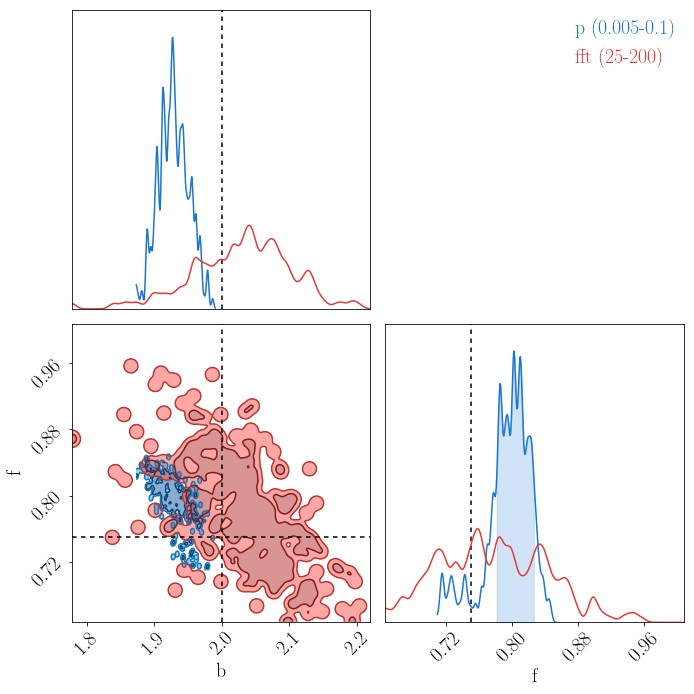

In [77]:
params = ['b', 'f', 's', 'n']
values = [2, 0.75, 3.5, 0.0003]
figname = 'test.png'

plot_triple( [bestparams_p, bestparams_xi], \
            [params, params, params, params, params],\
            values, figname,\
            linewidths = [1.5,1.5,1.5,1.5, 1.5],
            shade = [0.05, 0.05, 0, 0,0],
            kde = [False, False,False,False,False],
            colors = ['blue', 'red', 'green', 'black', 'purple'],           
            chain_names=['p (0.005-0.1)', 'fft (25-200)', 'pair counts (25-200)', 'p (0.005-0.2)', 'p (0.005-0.3)'],\
            figsize = (10,10),
            keep=[0,1]
            #keep = [0,1,5,6,7,9,10,11,12,13,14]
            )
            #keep = [0,1,2,3,4,5,6,7,9])

-----------------

# Full Mock Cov

In [273]:
# call He-eJong's Mock

mockdir = '../data_txt/Heejong/mockdatavectors/reformat_dv_r50_200/'
mocks_filename = os.listdir(mockdir)
mocks_filename.sort()

In [275]:
mock_datav = []
i=1
for fd in mocks_filename:
    if fd in ['kbin.txt', 'rbin.txt']: pass
    else : mock_datav.append( np.genfromtxt(mockdir + fd) )
    print i, '/', len(mocks_filename) , '\r', 
    i+=1
mock_datav = np.array(mock_datav)

In [280]:
os.path.exists(mockdir+'rbin.txt')

True

In [ ]:
basedir = '../data_txt/Heejong/output_fitting_mock_rmin1/'
maskp = np.genfromtxt(basedir + 'chain/mask_p.txt')
maskx = np.genfromtxt(basedir +'chain/mask_xi.txt')
maskcom = np.genfromtxt(basedir +'chain/mask_com.txt')
maskp = np.array(maskp, dtype=bool)
maskx = np.array(maskx, dtype=bool)
maskcom = np.array(maskcom, dtype=bool)

Np = np.sum(maskp)
Nx = np.sum(maskx)
Nc = np.sum(maskcom)

mx, my = np.mgrid[0:maskp.size, 0:maskp.size]

maskp_2d = maskp[mx] * maskp[my]
maskx_2d = maskx[mx] * maskx[my]
maskcom_2d = maskcom[mx] * maskcom[my]

In [262]:
maskp = np.genfromtxt('../data_txt/Heejong/output_fitting_mock_rmin1//chain/mask_p.txt')
maskx = np.genfromtxt('../data_txt/Heejong/output_fitting_mock_rmin1//chain/mask_xi.txt')
maskcom = np.genfromtxt('../data_txt/Heejong/output_fitting_mock_rmin1//chain/mask_com.txt')
maskp = np.array(maskp, dtype=bool)
maskx = np.array(maskx, dtype=bool)
maskcom = np.array(maskcom, dtype=bool)

Np = np.sum(maskp)
Nx = np.sum(maskx)
Nc = np.sum(maskcom)

mx, my = np.mgrid[0:maskp.size, 0:maskp.size]

maskp_2d = maskp[mx] * maskp[my]
maskx_2d = maskx[mx] * maskx[my]
maskcom_2d = maskcom[mx] * maskcom[my]

In [ ]:
mock_covtot = mock_covariance(mock_datav, mock_datav)

In [268]:
mock_covp = mock_covtot[maskp_2d].reshape(Np, Np)
mock_covxi = mock_covtot[maskx_2d].reshape(Nx, Nx)
mock_covcom = mock_covtot[maskcom_2d].reshape(Nc, Nc)
mock_covp = 0.5 * (mock_covp + mock_covp.T)
mock_covxi = 0.5 * (mock_covxi + mock_covxi.T)
mock_covtot = 0.5 * (mock_covtot + mock_covtot.T)

----------

plot save to  test.png


(<chainconsumer.chainconsumer.ChainConsumer at 0x7f09ee1b3290>,
 <matplotlib.figure.Figure at 0x7f09f3a69190>)

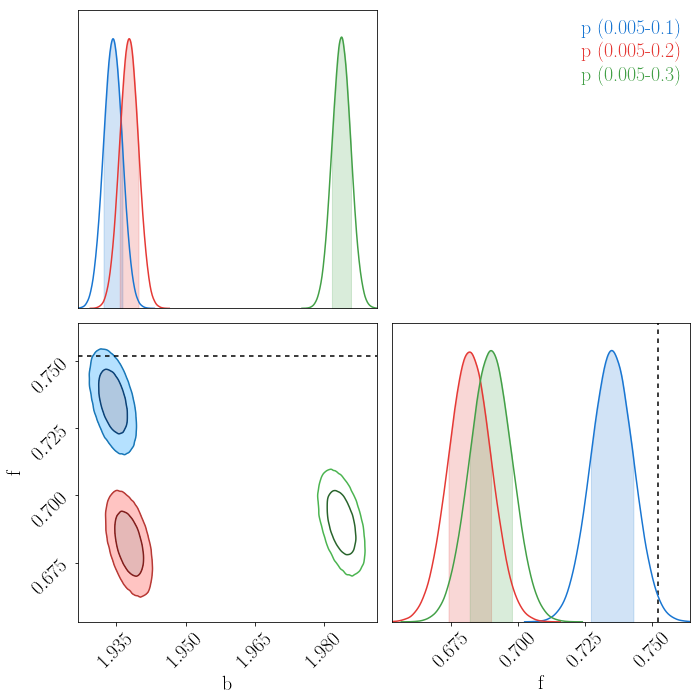

In [167]:
params = ['b', 'f', 's', 'n']
values = [2, 0.752, 3.5, 0.0003]
figname = 'test.png'

plot_triple([ chain_f1, chain_f2, chain_f3], \
            [params, params, params],\
            values, figname,\
            linewidths = [1.5,1.5,1.5,1.5],
            shade = [0.05, 0.05, 0, 0],
            kde = [False, False,False,False],
            colors = ['blue', 'red', 'green', 'black'],           
            chain_names=['p (0.005-0.1)', 'p (0.005-0.2)', 'p (0.005-0.3)'],\
            figsize = (10,10),
            keep=[0,1]
            #keep = [0,1,5,6,7,9,10,11,12,13,14]
            )
            #keep = [0,1,2,3,4,5,6,7,9])

In [168]:
#dpdb0,   ,_ = cosmo.derivative_P_bfs(0)      # dp/db
#dxdb,_,_ = cosmo.derivative_bfs(0)        # dxi/db
#dvdb = np.hstack((dpdb, dxdb))

dpdb0, dpdb2, dpdb4 = cosmo.dPb0, cosmo.dPb2, cosmo.dPb4
dpdf0, dpdf2, dpdf4 = cosmo.dPf0, cosmo.dPf2, cosmo.dPf4
dpds0, dpds2, dpds4 = cosmo.dPs0, cosmo.dPs2, cosmo.dPs4

dxdb0, dxdb2, dxdb4 = cosmo.dxib0, cosmo.dxib2, cosmo.dxib4
dxdf0, dxdf2, dxdf4 = cosmo.dxif0, cosmo.dxif2, cosmo.dxif4
dxds0, dxds2, dxds4 = cosmo.dxis0, cosmo.dxis2, cosmo.dxis4

AttributeError: class_discrete_covariance instance has no attribute 'dPb0'

In [31]:
covp00 = cosmo.covariance_PP00
covp02 = cosmo.covariance_PP02
covp04 = cosmo.covariance_PP04
covp22 = cosmo.covariance_PP22
covp24 = cosmo.covariance_PP24
covp44 = cosmo.covariance_PP44

In [32]:
covxi00 = cosmo.covariance00
covxi02 = cosmo.covariance02
covxi04 = cosmo.covariance04
covxi22 = cosmo.covariance22
covxi24 = cosmo.covariance24
covxi44 = cosmo.covariance44

In [33]:
covpxi00 = cosmo.covariance_PXi00
covpxi02 = cosmo.covariance_PXi02
covpxi04 = cosmo.covariance_PXi04
covpxi20 = cosmo.covariance_PXi20
covpxi22 = cosmo.covariance_PXi22
covpxi24 = cosmo.covariance_PXi24
covpxi40 = cosmo.covariance_PXi40
covpxi42 = cosmo.covariance_PXi42
covpxi44 = cosmo.covariance_PXi44

In [34]:
covpxi = stack3x3( a=[covpxi00, covpxi02, covpxi04 ],
                  b=[covpxi20, covpxi22, covpxi24 ],
                  c=[covpxi04, covpxi42, covpxi44 ] )
covxi = stack3x3( a=[covxi00, covxi02, covxi04 ],
                  b=[covxi02.T, covxi22, covxi24 ],
                  c=[covxi04.T, covxi24.T, covxi44 ] )
covp = stack3x3( a=[covp00, covp02, covp04 ],
                  b=[covp02.T, covp22, covp24 ],
                  c=[covp04.T, covp24.T, covp44 ] )

## Generate Mocks

In [338]:
N_mock = 1000
p_mock0, xi_mock0 = generate_mocks( cosmo, 0, cosmo.kcenter_y, p_model0, covp00, N_mock = N_mock )
p_mock2, xi_mock2 = generate_mocks( cosmo, 2, cosmo.kcenter_y, p_model2, covp22, N_mock = N_mock )
p_mock4, xi_mock4 = generate_mocks( cosmo, 4, cosmo.kcenter_y, p_model4, covp44, N_mock = N_mock )

generate mocks... size= 1000     
generate mocks... size= 1000     
generate mocks... size= 1000     


In [344]:
header = " cosmo = class_discrete_covariance(KMIN=0.0001, KMAX = 10, n=20000, \
                                  #RMIN = 0.001, RMAX = 200, n2 = 100, n_y = 200, \
                                  #b = 2.0, f = 0.74, s=3.5, nn=3.0e-04, \
                                  #rscale = 'lin', kscale='log')"

In [345]:
save_mocks( cosmo, cosmo.kcenter_y, p_mock0, cosmo.rcenter, xi_mock0, header = header, dir = '../data_txt/mocks_multipole/kbin200_r100_fineFourier/0/'  )
save_mocks( cosmo, cosmo.kcenter_y, p_mock2, cosmo.rcenter, xi_mock2, header = header, dir = '../data_txt/mocks_multipole/kbin200_r100_fineFourier/2/'  )
save_mocks( cosmo, cosmo.kcenter_y, p_mock4, cosmo.rcenter, xi_mock4, header = header, dir = '../data_txt/mocks_multipole/kbin200_r100_fineFourier/4/'  )


In [12]:

mockdir = '../data_txt/mocks_multipole/kbin200_r100_fineFourier/'
kcenter, p_mock0 = load_mocks( dir = mockdir+'/0/', probe='p' )
kcenter, p_mock2 = load_mocks( dir = mockdir+'/2/', probe='p' )
kcenter, p_mock4 = load_mocks( dir = mockdir+'/4/', probe='p' )

rcenter, xi_mock0 = load_mocks( dir = mockdir+'/0/', probe='xi' )
rcenter, xi_mock2 = load_mocks( dir = mockdir+'/2/', probe='xi' )
rcenter, xi_mock4 = load_mocks( dir = mockdir+'/4/', probe='xi' )

In [276]:
#mock_xi0 = fourier_tr_xi_mock(cosmo, 0, kcenter, mock_p0)
#mock_xi2 = fourier_tr_xi_mock(cosmo, 2, kcenter, mock_p0)
#mock_xi4 = fourier_tr_xi_mock(cosmo, 4, kcenter, mock_p0)

(-50, 130)

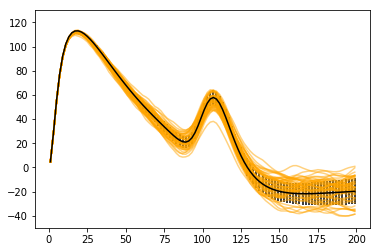

In [13]:

fig, ax = plt.subplots()
#for xi in xi_mock_test:
#    ax.plot(cosmo.rcenter, cosmo.rcenter**2*xi, '-', color='grey', alpha = 0.5)
    
for xi in xi_mock0[:50]:
    ax.plot(cosmo.rcenter, cosmo.rcenter**2*xi, '-', color='orange', alpha = 0.5)

ax.errorbar(cosmo.rcenter, cosmo.rcenter**2*xi_model0, yerr=cosmo.rcenter**2*np.sqrt(covxi00.diagonal()), 
            color = 'k', alpha = 1.0)

ax.set_ylim(-50, 130)



(-30, 130)

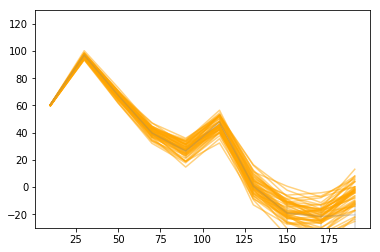

In [298]:

fig, ax = plt.subplots()
#for xi in xi_mock_test:
#    ax.plot(cosmo.rcenter, cosmo.rcenter**2*xi, '-', color='grey', alpha = 0.5)
    
for xi in xi_mock0[:50]:
    ax.plot(cosmo.rcenter, cosmo.rcenter**2*xi, '-', color='orange', alpha = 0.5)

ax.errorbar(cosmo.rcenter, cosmo.rcenter**2*xi_model0, yerr=cosmo.rcenter**2*np.sqrt(covxi00.diagonal()), 
            color = 'grey', alpha = 0.3)

ax.set_ylim(-30, 130)


In [226]:
#save_mocks( cosmo, cosmo.kcenter_y, p_mock0, cosmo.rcenter, xi_mock0, header = '', dir = '../data_txt/mocks_multipole/kbin500/0/'  )
#save_mocks( cosmo, cosmo.kcenter_y, p_mock2, cosmo.rcenter, xi_mock2, header = '', dir = '../data_txt/mocks_multipole/kbin500/2/'  )
#save_mocks( cosmo, cosmo.kcenter_y, p_mock4, cosmo.rcenter, xi_mock4, header = '', dir = '../data_txt/mocks_multipole/kbin500/4/'  )


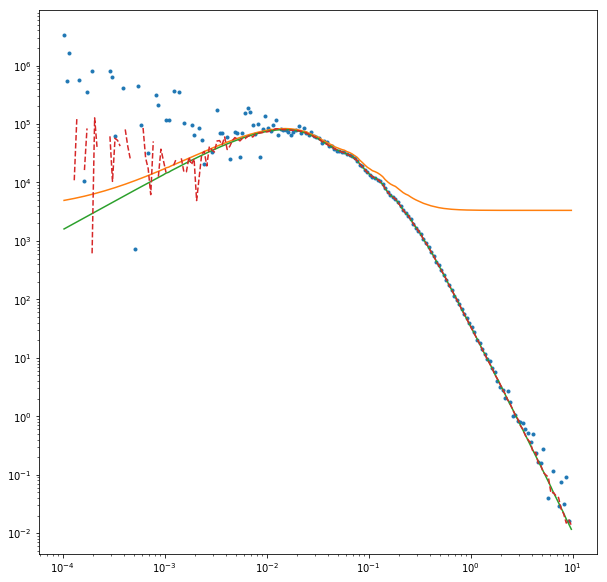

In [110]:
fig, ax = plt.subplots(figsize = (10,10))
ax.loglog(cosmo.kcenter_y, p_mock0[0], '.')
ax.loglog(cosmo.kcenter_y, p_model0 + 1./cosmo.nn)
ax.loglog(cosmo.kcenter_y, p_model0)
ax.loglog(cosmo.kcenter_y, p_mock0_mean, '--')

(-100000, 100000)

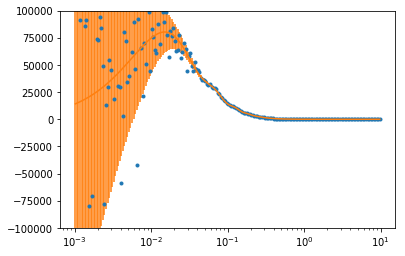

In [14]:
fig, ax = plt.subplots()
ax.loglog(cosmo.kcenter_y, p_mock0[0], '.')
#ax.loglog(cosmo.kcenter_y, p_model0)
ax.errorbar(cosmo.kcenter_y, p_model0, yerr=np.sqrt(covp00.diagonal()))
#ax.set_yscale('linear')
ax.set_yscale('linear')
ax.set_xscale('log')
ax.set_ylim(-100000, 100000)

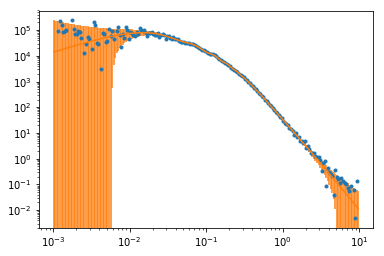

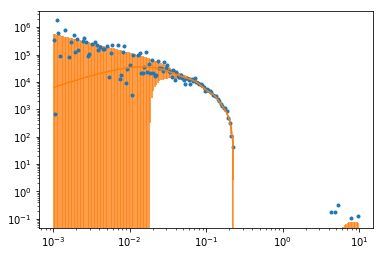

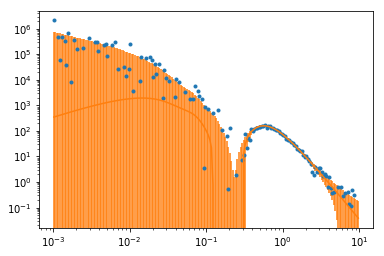

In [15]:
fig, ax = plt.subplots()
ax.loglog(cosmo.kcenter_y, p_mock0[0], '.')
#ax.loglog(cosmo.kcenter_y, p_model0)
ax.errorbar(cosmo.kcenter_y, p_model0, yerr=np.sqrt(covp00.diagonal()))
#ax.set_yscale('linear')
ax.set_yscale('log')

fig, ax = plt.subplots()
#ax.loglog(cosmo.kcenter_y, p_mock2_test[0], '.')
ax.loglog(cosmo.kcenter_y, p_mock2[0], '.')
ax.errorbar(cosmo.kcenter_y, p_model2, yerr=np.sqrt(covp22.diagonal()))
#ax.loglog(cosmo.kcenter_y, p_model2)
ax.set_yscale('log')

fig, ax = plt.subplots()
ax.loglog(cosmo.kcenter_y, p_mock4[2], '.')
#ax.loglog(cosmo.kcenter_y, p_model4)
ax.errorbar(cosmo.kcenter_y, p_model4, yerr=np.sqrt(covp44.diagonal()))
ax.set_yscale('log')


<Container object of 3 artists>

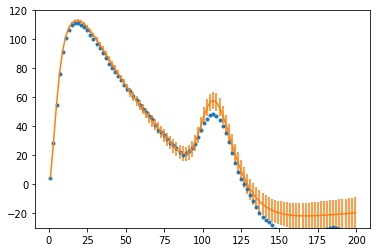

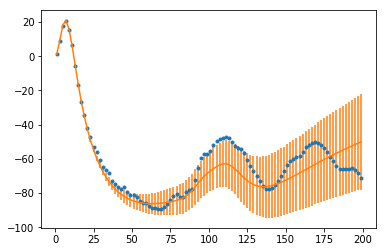

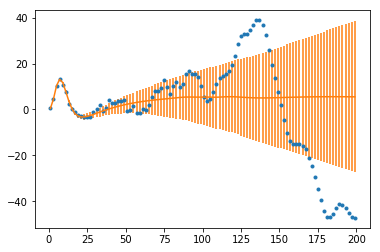

In [16]:
fig, ax = plt.subplots()
ax.plot(cosmo.rcenter, cosmo.rcenter**2*xi_mock0[2], '.')
ax.errorbar(cosmo.rcenter, cosmo.rcenter**2*xi_model0, yerr=cosmo.rcenter**2*np.sqrt(covxi00.diagonal()))


ax.set_ylim(-30, 120)

fig, ax = plt.subplots()
ax.plot(cosmo.rcenter, cosmo.rcenter**2*xi_mock2[20], '.')
ax.errorbar(cosmo.rcenter, cosmo.rcenter**2*xi_model2, yerr=cosmo.rcenter**2*np.sqrt(covxi22.diagonal()))

#ax.set_ylim(-30, 120)

fig, ax = plt.subplots()
ax.plot(cosmo.rcenter, cosmo.rcenter**2*xi_mock4[4], '.')
ax.errorbar(cosmo.rcenter, cosmo.rcenter**2*xi_model4, yerr=cosmo.rcenter**2*np.sqrt(covxi44.diagonal()))

#ax.set_ylim(-30, 120)

Mock Covariance matrices

In [17]:
p_mock_datav = np.hstack([p_mock0, p_mock2, p_mock4])
xi_mock_datav = np.hstack([xi_mock0, xi_mock2, xi_mock4])
mock_datav = np.hstack([p_mock_datav, xi_mock_datav])

In [18]:
mock_covp = mock_covariance(p_mock_datav, p_mock_datav)
mock_covxi = mock_covariance(xi_mock_datav, xi_mock_datav)
mock_covpxi = mock_covariance(p_mock_datav, xi_mock_datav)
mock_covtot = mock_covariance(mock_datav, mock_datav)

mock_covp = 0.5 * (mock_covp + mock_covp.T)
mock_covxi = 0.5 * (mock_covxi + mock_covxi.T)
mock_covtot = 0.5 * (mock_covtot + mock_covtot.T)

In [19]:
mock_covp.shape

(600, 600)

In [20]:
cut = p_mock0[0].size
mock_covp00 = mock_covp[:cut, :cut] #mock_covariance(p_mock0, p_mock0)
mock_covp02 = mock_covp[:cut, cut:2*cut] #mock_covariance(p_mock0, p_mock2)
mock_covp04 = mock_covp[:cut, 2*cut:] #mock_covariance(p_mock0, p_mock4)
mock_covp22 = mock_covp[cut:2*cut, cut:2*cut] #mock_covariance(p_mock2, p_mock2)
mock_covp24 = mock_covp[cut:2*cut, 2*cut:] #mock_covariance(p_mock2, p_mock4)
mock_covp44 = mock_covp[2*cut:, 2*cut:] #mock_covariance(p_mock4, p_mock4)

In [21]:
mock_covp00.shape, mock_covp44.shape, cut

((200, 200), (200, 200), 200)

In [22]:
cutr = xi_mock0[0].size
mock_covpxi00 = mock_covpxi[:cut, :cutr]#mock_covariance(p_mock0, xi_mock0)
mock_covpxi02 = mock_covpxi[:cut, cutr:2*cutr]#mock_covariance(p_mock0, xi_mock2)
mock_covpxi04 = mock_covpxi[:cut, 2*cutr:]#mock_covariance(p_mock0, xi_mock4)

mock_covpxi20 = mock_covpxi[cut:2*cut, :cutr]#mock_covariance(p_mock2, xi_mock0)
mock_covpxi22 = mock_covpxi[cut:2*cut, cutr:2*cutr]#mock_covariance(p_mock2, xi_mock2)
mock_covpxi24 = mock_covpxi[cut:2*cut, 2*cutr:]#mock_covariance(p_mock2, xi_mock4)

mock_covpxi40 = mock_covpxi[2*cut:, :cutr] #mock_covariance(p_mock4, xi_mock0)
mock_covpxi42 = mock_covpxi[2*cut:, cutr:2*cutr] #mock_covariance(p_mock4, xi_mock2)
mock_covpxi44 = mock_covpxi[2*cut:, 2*cutr:] #mock_covariance(p_mock4, xi_mock4)

In [23]:
mock_covpxi00.shape

(200, 100)

In [24]:
mock_covxi00 = mock_covxi[:cutr, :cutr]#mock_covariance(xi_mock0, xi_mock0)
mock_covxi02 = mock_covxi[:cutr, cutr:2*cutr]#mock_covariance(xi_mock0, xi_mock2)
mock_covxi04 = mock_covxi[:cutr, 2*cutr:]#mock_covariance(xi_mock0, xi_mock4)
mock_covxi22 = mock_covxi[cutr:2*cutr, cutr:2*cutr]#mock_covariance(xi_mock2, xi_mock2)
mock_covxi24 = mock_covxi[cutr::2*cutr, 2*cutr:]#mock_covariance(xi_mock2, xi_mock4)
mock_covxi44 = mock_covxi[2*cutr:, 2*cutr:]#mock_covariance(xi_mock4, xi_mock4)

In [189]:
"""
mock_covp = stack3x3( a=[mock_covp00,mock_covp02, mock_covp04 ],
                 b=[mock_covp02,mock_covp22, mock_covp24 ],
                 c=[mock_covp04,mock_covp24, mock_covp44 ] )
mock_covpxi = stack3x3( a=[mock_covpxi00,mock_covpxi02, mock_covpxi04 ],
                   b=[mock_covpxi20,mock_covpxi22, mock_covpxi24 ],
                   c=[mock_covpxi40,mock_covpxi42, mock_covpxi44 ] )
mock_covxi = stack3x3( a=[mock_covxi00,mock_covxi02, mock_covxi04 ],
                       b=[mock_covxi02.T,mock_covxi22, mock_covxi24 ],
                       c=[mock_covxi04.T,mock_covxi24.T, mock_covxi44 ] )
mock_covxi = 0.5 * (mock_covxi + mock_covxi.T)
"""

In [311]:
#mock_covtot = stack2x2( a = [covp, covpxi], b = [covpxi.T, covxi ] )

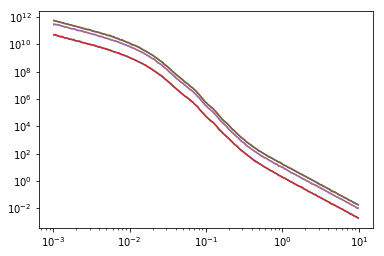

In [25]:
fig, ax = plt.subplots()
ax.loglog( cosmo.kcenter_y, covp00.diagonal())
ax.loglog( cosmo.kcenter_y, covp22.diagonal())
ax.loglog( cosmo.kcenter_y, covp44.diagonal())
ax.loglog( cosmo.kcenter_y, mock_covp00.diagonal())
ax.loglog( cosmo.kcenter_y, mock_covp22.diagonal())
ax.loglog( cosmo.kcenter_y, mock_covp44.diagonal())

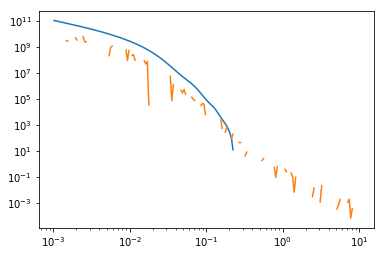

In [26]:
fig, ax = plt.subplots()
#ax.loglog( cosmo.kcenter_y, covp02.diagonal())
#ax.loglog( cosmo.kcenter_y, covp04.diagonal())
ax.loglog( cosmo.kcenter_y, covp24.diagonal())
#ax.loglog( cosmo.kcenter_y, mock_covp02.diagonal())
#ax.loglog( cosmo.kcenter_y, mock_covp04.diagonal())
ax.loglog( cosmo.kcenter_y, mock_covp24.diagonal())

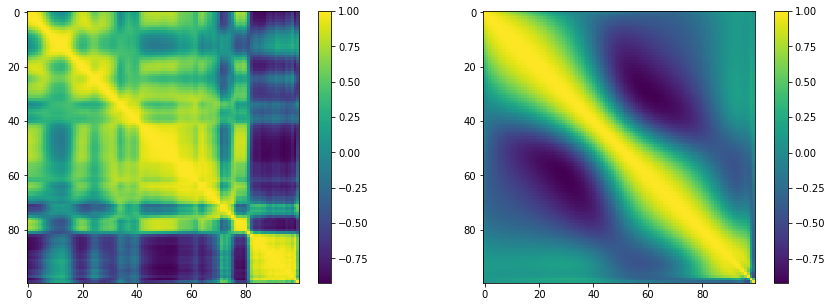

In [27]:
fig, (ax, ax2) = plt.subplots(1,2, figsize = (15,5))
im = ax.imshow(np.corrcoef(mock_covxi04) )
im2 = ax2.imshow(np.corrcoef(covxi04) )
fig.colorbar(im, ax=ax)
fig.colorbar(im2, ax=ax2)

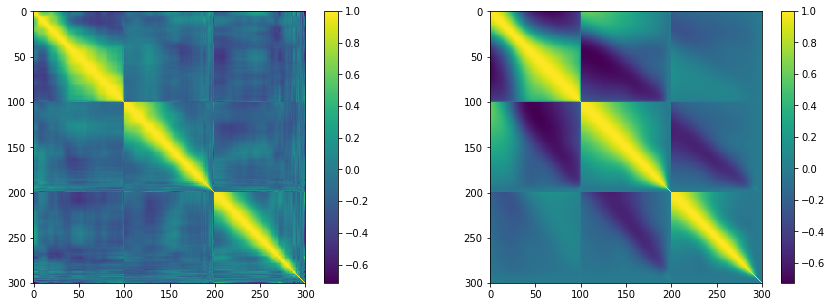

In [28]:
fig, (ax, ax2) = plt.subplots(1,2, figsize = (15,5))
im = ax.imshow(np.corrcoef(mock_covxi) )
im2 = ax2.imshow(np.corrcoef(covxi) )
fig.colorbar(im, ax=ax)
fig.colorbar(im2, ax=ax2)

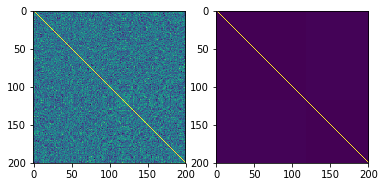

In [30]:
fig, (ax,ax2) = plt.subplots(1,2)
ax.imshow(np.corrcoef(mock_covp02) )
ax2.imshow(np.corrcoef(covp02) )

### Theory Datavector with varying bias

#### 2D Interpolation 

In [51]:
datavp_interp, datavxi_interp = datavector_bias_2d_interp(cosmo)
cosmo.b = 2.0 

Calculate datavector p(b) and xi(b) for b = [0.5,3.5]
generate 2D interpolation table


In [52]:
# interpolate
bbin = np.linspace(0.5, 3.5, 20000)
datav_p = datavp_interp(kcenter, bbin)
datav_xi = datavxi_interp(cosmo.rcenter, bbin)
datav_com = np.hstack((datav_p, datav_xi))

#### Mock, Theory data vectors

#### Mock cov, Theoretical Cov

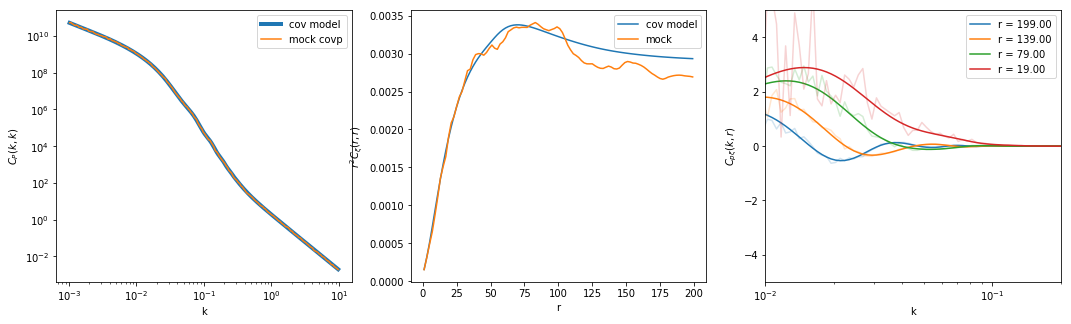

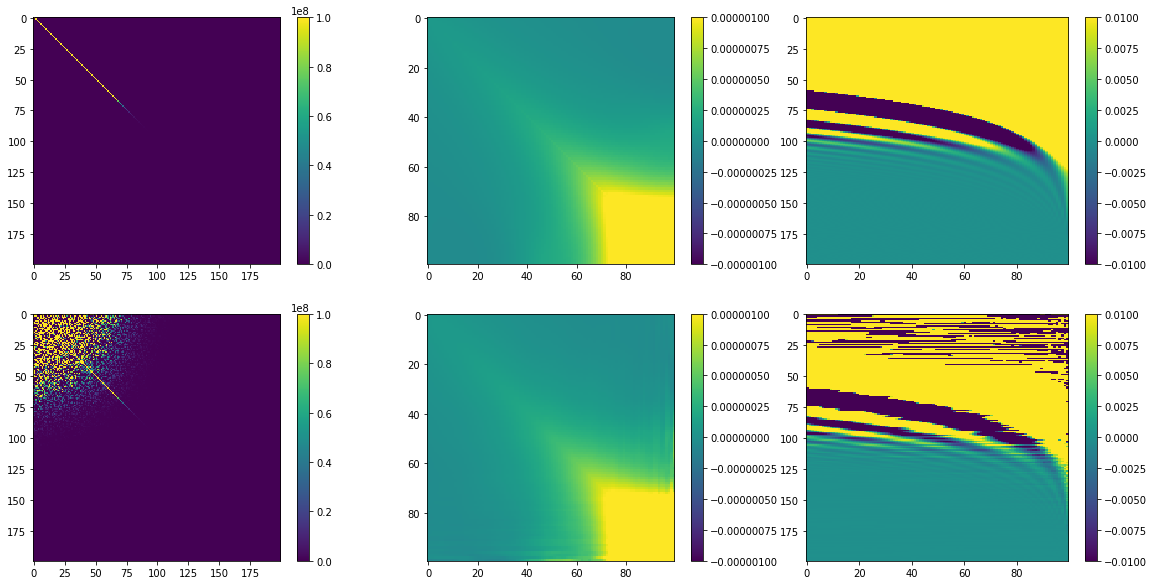

In [31]:

fig, (ax, ax2, ax3) = plt.subplots(1,3, figsize = (18,5))

kcenter= cosmo.kcenter_y

ax.loglog(kcenter, covp00.diagonal(), '-', linewidth = 4.0, label = 'cov model')
ax.loglog(kcenter, mock_covp00.diagonal(), '-', label ='mock covp')
ax.set_xlabel('k')
ax.set_ylabel(r'$C_P (k,k)$')
ax.legend()

#fig, ax = plt.subplots()
ax2.plot(cosmo.rcenter, cosmo.rcenter**2*covxi00.diagonal(), label='cov model')
ax2.plot(cosmo.rcenter, cosmo.rcenter**2*mock_covxi00.diagonal(), '-', label = 'mock')
#ax.plot(cosmo.rcenter, cosmo.rcenter**2*cov_xi_3.diagonal(), '-', label = 'model2')
ax2.set_xlabel('r')
ax2.set_ylabel(r'$r^2 C_{\xi}(r,r)$')
ax2.legend()


#fig, ax = plt.subplots()
for i in np.arange(0, cosmo.rcenter.size, 30):
    ax3.plot(kcenter, mock_covpxi00[:,i], alpha = 0.2)
    ax3.plot(kcenter, covpxi00[:,i], label='r = {:0.2f}'.format(cosmo.rcenter[i]), color = ax3.lines[-1].get_color())
    
ax3.set_ylim(-5, 5)
ax3.set_xlim(1e-02,0.2)
ax3.set_xlabel('k')
ax3.set_ylabel(r'$C_{p\xi}(k,r)$')
ax3.set_xscale('log')
ax3.legend(loc='best')


fig, ((ax, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (20,10))
im = ax.imshow(covp00, vmax = 1e8, vmin = 0)
im2 = ax2.imshow(covxi00, vmax=0.000001, vmin=-0.000001)
im3 = ax3.imshow(covpxi00, aspect='auto', vmax=0.01, vmin=-0.01)

im4 = ax4.imshow(mock_covp00, vmax = 1e8, vmin = 0)
im5 = ax5.imshow(mock_covxi00, vmax=0.000001, vmin=-0.000001)
im6 = ax6.imshow(mock_covpxi00, aspect='auto', vmax=0.01, vmin=-0.01)

fig.colorbar(im,ax=ax)
fig.colorbar(im2,ax=ax2)
fig.colorbar(im3,ax=ax3)
fig.colorbar(im4,ax=ax4)
fig.colorbar(im5,ax=ax5)
fig.colorbar(im6,ax=ax6)

## Calcuate Bestfit Bias 

Setting k range and r range

In [49]:
kmin = 0.01
kmax = 0.5
rmin = 0.1
rmax = 200

#### Theoretical calculation 

In [58]:
sigma_p = getting_sigma_bs_theory( cosmo, b = bbin, cov = covp00, datavs = dpdb0, 
                                     mockdatavs = None, p=True, kmin=kmin, kmax=kmax )
sigma_x = getting_sigma_bs_theory( cosmo, b = bbin, cov = covxi00, datavs = dxdb0, 
                                     mockdatavs = None, rmin = rmin, rmax=rmax )
sigma_c = getting_sigma_bs_com_theory( cosmo, b = bbin, cov = covtot00, 
                                     datavs = dvdb, mockdatavs = None,
                                    kmin = kmin, kmax = kmax, rmin=rmin, rmax=rmax)
sigma_d = getting_sigma_bs_diff_theory( cosmo, b = bbin, covp = covp00, covxi = covxi00, 
                          datavsp = dpdb0, datavsxi = dxdb0, 
                          mockdatavsp = None, mockdatavsxi = None, kmin=kmin, kmax=kmax, rmin=rmin, rmax=rmax )


# print out results-------------------------------
print '---------------------------------\
\n Error on bias (Theory) \n sigma_p      : {} \n sigma_xi     : {} \n sigma_combin : {} \n sigma_diff   : {} \
\n---------------------------------'.format(sigma_p, sigma_x, sigma_c, sigma_d)

Nk  0  kmin 8000  kmax 14796


IndexError: boolean index did not match indexed array along dimension 0; dimension is 20001 but corresponding boolean dimension is 500

In [66]:
sigma_p = getting_sigma_bs_theory( cosmo2, b = bbin, cov = covp_model, datavs = dpdb, 
                                     mockdatavs = None, p=True, kmin=kmin, kmax=kmax )
sigma_x = getting_sigma_bs_theory( cosmo2, b = bbin, cov = covxi_model, datavs = dxdb, 
                                     mockdatavs = None, rmin = rmin, rmax=rmax )
sigma_c = getting_sigma_bs_com_theory( cosmo2, b = bbin, cov = covtot_model, 
                                     datavs = dvdb, mockdatavs = None,
                                    kmin = kmin, kmax = kmax, rmin=rmin, rmax=rmax)
sigma_d = getting_sigma_bs_diff_theory( cosmo2, b = bbin, covp = covp_model, covxi = covxi_model, 
                          datavsp = dpdb, datavsxi = dxdb, 
                          mockdatavsp = None, mockdatavsxi = None, kmin=kmin, kmax=kmax, rmin=rmin, rmax=rmax )


# print out results-------------------------------
print '---------------------------------\
\n Error on bias (Theory) \n sigma_p      : {} \n sigma_xi     : {} \n sigma_combin : {} \n sigma_diff   : {} \
\n---------------------------------'.format(sigma_p, sigma_x, sigma_c, sigma_d)

Nk  1699  kmin 1000  kmax 2698
 theory : 0.001377065436412227
Nr  85  rmin 94  rmax 10
 theory : 0.0038974082149789767
N  1784  kmin 1000  kmax 2698  rmin 94  rmax 10
 theory : 0.0012909615429417696
Nk  1699  kmin 1000  kmax 2698
Nr  85  rmin 94  rmax 10
 theory : 0.0012984014805924172
---------------------------------
 Error on bias (Theory) 
 sigma_p      : 0.00137706543641 
 sigma_xi     : 0.00389740821498 
 sigma_combin : 0.00129096154294 
 sigma_diff   : 0.00129840148059 
---------------------------------


#### Mock : Perform chisquare calculation to obtain bestfit biases with Cp, Cxi, Ctot, Cdiff

In [176]:
Nb = 10
Nf = 10
Ns = 10
b_bin = np.linspace(1.9, 2.1, Nb)
f_bin = np.linspace(0.6, 0.9, Nf)
s_bin = np.linspace(3.3, 3.7, Ns)
#M1, M2, M3 = np.mgrid[:Nb, :Nf, :Ns]
M1, M2 = np.mgrid[:Nb, :Nf]
b_grid = b_bin[M1]
f_grid = f_bin[M2]
#s_grid = s_bin[M3]

In [177]:
#datavlist = []
#datavlist_xi = []

datavlistp0 = np.zeros((Nb, Nf, cosmo.kcenter_y.size))
datavlistp2 = np.zeros((Nb, Nf, cosmo.kcenter_y.size))
datavlistp4 = np.zeros((Nb, Nf, cosmo.kcenter_y.size))

datavlistxi0 = np.zeros((Nb, Nf, cosmo.rcenter.size))
datavlistxi2 = np.zeros((Nb, Nf, cosmo.rcenter.size))
datavlistxi4 = np.zeros((Nb, Nf, cosmo.rcenter.size))

k=0
for i in range(Nb):
    for j in range(Nf):
        bb = b_grid[i,j]
        ff = f_grid[i,j]
        datavp0, datavxi0 = compute_data_vector(cosmo, l=0, b=bb, f=ff, s=cosmo.s)
        datavp2, datavxi2 = compute_data_vector(cosmo, l=2, b=bb, f=ff, s=cosmo.s)
        datavp4, datavxi4 = compute_data_vector(cosmo, l=4, b=bb, f=ff, s=cosmo.s)
        
        datavlistp0[i,j,:] = datavp0 #np.hstack([datavp0, datavp2, datavp4])
        datavlistp2[i,j,:] = datavp2
        datavlistp4[i,j,:] = datavp4
        
        datavlistxi0[i,j,:] = datavxi0 #np.hstack([datavxi0, datavxi2, datavxi4])
        datavlistxi2[i,j,:] = datavxi2
        datavlistxi4[i,j,:] = datavxi4
        
        #datavlist.append(datavp)
        #datavlist_xi.append(datavxi)
        print 'b={:0.2f}, f={:0.2f}  {}/{}                   \r'.format(bb, ff, k+1, Nb * Nf),
        k+=1

In [383]:
#datavlist_reshape = np.array(datavlist).reshape(Nb, Nf, cosmo.kcenter_y.size)
#datavlist_xi_reshape = np.array(datavlist_xi).reshape(Nb, Nf, cosmo.rcenter.size)

In [178]:
from scipy.interpolate import RegularGridInterpolator
datavp0_bf_interp = RegularGridInterpolator( (b_bin, f_bin, cosmo.kcenter_y), datavlistp0 )
datavp2_bf_interp = RegularGridInterpolator( (b_bin, f_bin, cosmo.kcenter_y), datavlistp2 )
datavp4_bf_interp = RegularGridInterpolator( (b_bin, f_bin, cosmo.kcenter_y), datavlistp4 )

In [179]:
from scipy.interpolate import RegularGridInterpolator
datavxi0_bf_interp = RegularGridInterpolator( (b_bin, f_bin, cosmo.rcenter[::-1]), datavlistxi0 )
datavxi2_bf_interp = RegularGridInterpolator( (b_bin, f_bin, cosmo.rcenter[::-1]), datavlistxi2 )
datavxi4_bf_interp = RegularGridInterpolator( (b_bin, f_bin, cosmo.rcenter[::-1]), datavlistxi4 )

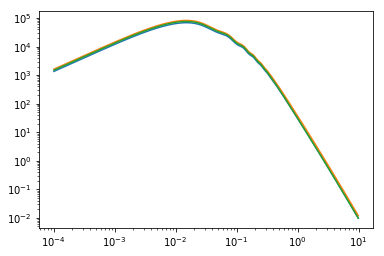

In [180]:
fig, ax = plt.subplots()
ax.loglog(cosmo.kcenter_y, datavlistp0[0,0,:])
ax.loglog(cosmo.kcenter_y, datavlistp0[-1,0,:])
ax.loglog(cosmo.kcenter_y, datavlistp0[0,-1,:])

In [444]:

#M1, M2 = np.mgrid[:bb_bin.size, :ff_bin.size]
#bb_grid = bb_bin[M1]
#ff_grid = ff_bin[M2]
#kk_grid = cosmo.kcenter_y[M3]

In [181]:
def getting_sigma_bf_2d(bestfit_params, cov=None, mocks = None, datavp = None, p=False ):
     
    from multiprocessing import Process, Queue
    from run_error_analysis import DiagonalBlockwiseInversion3x3
    
    if p : kcenter = cosmo.kcenter_y
    else : kcenter = cosmo.rcenter
    
    bb_bin = np.linspace(1.95, 2.05, 500)
    ff_bin = np.linspace(0.7, 0.8, 500)

    datav0_bf_interp, datav2_bf_interp, datav4_bf_interp = datavp
    #p_mock0, p_mock2, p_mock4 = mocks

    Fp = np.linalg.pinv(cov)
    
    #if p:
    #    kcenter = cosmo.kcenter_y
    #    Fp = DiagonalBlockwiseInversion3x3( *tuple(covplist) )
        
    #else : 
    #    kcenter = cosmo.rcenter
    #    covxi = stack3x3( a= covplist[:3], b= covplist[3:6], c= covplist[6:] )
    #    Fp = np.linalg.inv( covxi )
        
    N_mock = len(mocks[:,0])
    
    #bestfit_params = []
    #bestfit_f = []
    for k in range(N_mock): 
        
    #def chisquare_2d(q, order, k ):
        
        print 'initializing '+ str(k+1)+'th mocks...',
        sys.stdout.flush()
        mv = mocks[k,:] #np.hstack([ p_mock0[k,:], p_mock2[k,:], p_mock4[k,:] ])
        chi2result = np.zeros((bb_bin.size, ff_bin.size))
        
        for i in range(bb_bin.size):
            for j in range(ff_bin.size):
                bb = bb_bin[i]
                ff = ff_bin[j]
                #print bb, ff
                #dv, _ = compute_data_vector(cosmo, b=b_grid[i,j], f=f_grid[i,j], s=3.5)
                dv0 = np.array([datav0_bf_interp( [bb, ff, kc] ) for kc in kcenter ])
                dv2 = np.array([datav2_bf_interp( [bb, ff, kc] ) for kc in kcenter ])
                dv4 = np.array([datav4_bf_interp( [bb, ff, kc] ) for kc in kcenter ])
                dv = np.hstack([dv0.ravel(), dv2.ravel(), dv4.ravel()])
                #print dv.shape, dv0.shape
                chi2result[i,j] = best_chisqr( covinv = Fp, datav=dv, mockv = mv, p=False)
                sys.stdout.write("\r" + 'mock='+ str(k+1)+ '/'+ str(N_mock) +'  '+str(i)+','+str(j)+'  chi2='+str(chi2result[i,j]))
            #sys.stdout.write('.')
                sys.stdout.flush()
                                 
        #print 'mock=', str(k+1), '/', N_mock, '  ', i,j, '  chi2=', chi2result[i,j]
        sys.stdout.flush()
        
        #indmin_i, indmin_j = np.argmin(chi2result)
        ind = np.unravel_index(np.argmin(chi2result, axis=None), chi2result.shape)
        bestfit_param = [bb_bin[ind[0]], ff_bin[ind[1]]]
        #q.put((order, bestfit_param))
        bestfit_params.append( [bb_bin[ind[0]], ff_bin[ind[1]]] )
        k += 1
        
        
    """
    #inputs = ((0,0), (0,2), (2,2), (0,4), (2,4), (4,4),)
    inputs = np.arange(N_mock)
    d_queue = Queue()
    d_processes = [Process(target=chisquare_2d, args=(d_queue, z[0], z[1])) for z in zip(range(len(inputs)), inputs)]
    for p in d_processes:
        p.start()

    result = []
    percent = 0.0
    #print ''
    for d in d_processes:
        result.append(d_queue.get())
        #percent += + 1./len( d_processes ) * 100
        #sys.stdout.write("\r" + 'cov_Xi : multiprocessing {:0.0f} %'.format( percent ))
        #sys.stdout.flush()

    result.sort()
    result1 = [D[1] for D in result]
    return result1
    """
    #return bestfit_params #bestfit_b, bestfit_f
        #chi2result_interp = interp_2d(b_bin, f_bin, chi2result)

In [ ]:
bestfit_params_p = []

getting_sigma_bf_2d( 
    bestfit_params_p, 
    p = True,
    #covplist = [covp00, covp02, covp04, 
    #            covp02.T, covp22, covp24, 
    #            covp04.T, covp24.T, covp44],
    cov = mock_covp,
    mocks = p_mock_datav, 
    datavp = [datavp0_bf_interp, datavp2_bf_interp, datavp4_bf_interp] )

In [148]:
xi_mock0_re = np.vstack((xi_mock0[1:,], xi_mock0[0,:]))
xi_mock2_re = np.vstack((xi_mock2[1:,], xi_mock2[0,:]))
xi_mock4_re = np.vstack((xi_mock4[1:,], xi_mock4[0,:]))
xi_mock_datav_re = np.hstack([xi_mock0_re, xi_mock2_re, xi_mock4_re])

In [182]:
bestfit_params_xi = []
getting_sigma_bf_2d( 
    bestfit_params_xi, 
    p = False,
    cov = mock_covxi,
    mocks = xi_mock_datav_re, 
    datavp = [datavxi0_bf_interp, datavxi2_bf_interp, datavxi4_bf_interp] )

mock=2/2000  49,422  chi2=1137321039.58320122 initializing 2th mocks...

KeyboardInterrupt: 

In [183]:
bestfit_params_xi

[[1.95, 0.7]]

In [526]:
covp_bf_mock = mock_covariance(bestfit_params_p, bestfit_params_p)
#covpxi_bf_mock = mock_covariance(bestfit_params_p, bestfit_params_xi)
covxi_bf_mock = mock_covariance(bestfit_params_xi, bestfit_params_xi)
bestfit_params = np.hstack([bestfit_params_p, bestfit_params_xi])
covtot_bf_mock = mock_covariance(bestfit_params, bestfit_params)

In [528]:
covtot_bf_mock

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [449]:
dv = np.array([datavp_bf_interp( [2, 0.74, kc] ) for kc in cosmo.kcenter_y ])

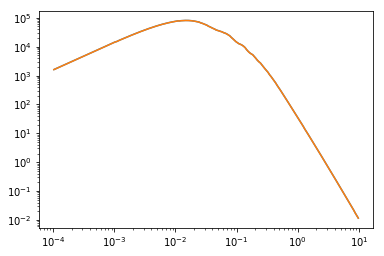

In [451]:
fig, ax = plt.subplots()
ax.loglog(cosmo.kcenter_y, dv)
ax.loglog(cosmo.kcenter_y, p_model0)

In [ ]:
bestfit_b_p, chi2p = getting_sigma_bfs( cosmo, b = bbin, cov = covp00, datavs = datav_p, 
                                     mockdatavs = p_mock0[:10, :], p=True, kmin=kmin, kmax=kmax )

Nk  68  kmin 80  kmax 147


TypeError: 'NoneType' object has no attribute '__getitem__'

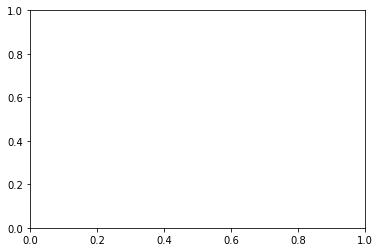

In [342]:
bestfit_b_p, chi2p = getting_sigma_bs( cosmo, b = bbin, cov = covp00, datavs = None, #datav_p, 
                                     mockdatavs = p_mock0[:10, :], p=True, kmin=kmin, kmax=kmax )

Nr  100  rmin 99  rmax 0
 sigma_b : 0.0012644306523058265
 theory : 0.0010127260061169184


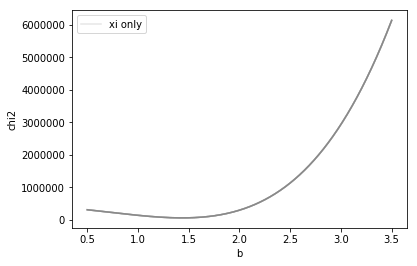

In [341]:
bestfit_b_xi, chi2x = getting_sigma_bs( cosmo, b = bbin, cov = covxi00, datavs = datav_xi, 
                                     mockdatavs = xi_mock0[:10,:], rmin = rmin, rmax=rmax )

Nk  1699  kmin 1000  kmax 2698


KeyboardInterrupt: 

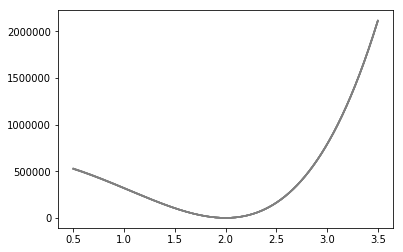

In [170]:

bestfit_b_p, chi2p = getting_sigma_bs( cosmo2, b = bbin, cov = covp_model, datavs = datav_p, 
                                     mockdatavs = p_mock, p=True, kmin=kmin, kmax=kmax )
bestfit_b_xi, chi2x = getting_sigma_bs( cosmo2, b = bbin, cov = covxi_model, datavs = datav_xi, 
                                     mockdatavs = xi_mock, rmin = rmin, rmax=rmax )
bestfit_b_com, chi2_com = getting_sigma_bs_com( cosmo2, b = bbin, cov = covtot_model, 
                                     datavs = datav_com, mockdatavs = mocks,
                                    kmin = kmin, kmax = kmax, rmin=rmin, rmax=rmax)
bestfit_b_diff ,chi2_diff = getting_sigma_bs_diff( cosmo2, b = bbin, covp = covp_model, covxi = covxi_model, 
                          datavsp = datav_p, datavsxi = datav_xi, 
                          mockdatavsp = p_mock, mockdatavsxi = xi_mock, kmin=kmin, kmax=kmax, rmin=rmin, rmax=rmax )


(0, 500000.0)

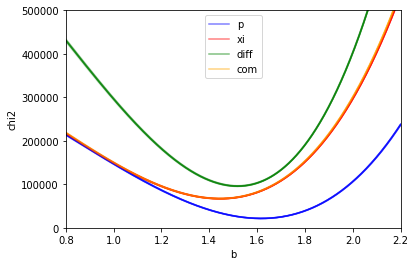

In [123]:
fig, ax = plt.subplots()

for i in range(chi2p.shape[0]/5) : 
    ax.plot(bbin, chi2p[i,:], color = 'blue', alpha = 0.1 )#, label='p')
    ax.plot(bbin, chi2x[i,:], color = 'red', alpha = 0.1 )#, label='xi')
    ax.plot(bbin, chi2_diff[i,:], color = 'green', alpha = 0.1)#, label='diff')
    ax.plot(bbin, chi2_com[i,:], color = 'orange', alpha = 0.1 )#, label='com')
ax.plot(bbin, chi2p[0,:], color = 'blue', alpha = 0.5 , label='p')
ax.plot(bbin, chi2x[0,:], color = 'red', alpha = 0.5 , label='xi')
ax.plot(bbin, chi2_diff[0,:], color = 'green', alpha = 0.5, label='diff')
ax.plot(bbin, chi2_com[0,:], color = 'orange', alpha = 0.5 , label='com')
ax.set_xlabel('b')
ax.set_ylabel('chi2')
ax.legend(loc='best')
ax.set_xlim(0.8, 2.2)
ax.set_ylim(0, 5e05)

Nk  41  kmin 40  kmax 80


KeyboardInterrupt: 

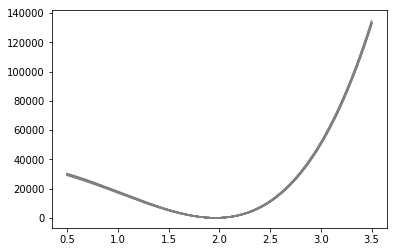

In [53]:

bestfit_b_p, chi2p = getting_sigma_bs( cosmo2, b = bbin, cov = covp_model, datavs = datav_p, 
                                     mockdatavs = p_mock, p=True, kmin=kmin, kmax=kmax )
bestfit_b_xi, chi2x = getting_sigma_bs( cosmo2, b = bbin, cov = covxi_model, datavs = datav_xi, 
                                     mockdatavs = xi_mock, rmin = rmin, rmax=rmax )
bestfit_b_diff ,chi2_diff = getting_sigma_bs_diff( cosmo2, b = bbin, covp = covp_model, covxi = covxi_model, 
                          datavsp = datav_p, datavsxi = datav_xi, 
                          mockdatavsp = p_mock, mockdatavsxi = xi_mock, kmin=kmin, kmax=kmax, rmin=rmin, rmax=rmax )
bestfit_b_com, chi2_com = getting_sigma_bs_com( cosmo2, b = bbin, cov = covtot_model, 
                                     datavs = datav_com, mockdatavs = mocks,
                                    kmin = kmin, kmax = kmax, rmin=rmin, rmax=rmax)

In [54]:
# print out results-------------------------------
sigma_pm, sigma_xm, sigma_cm, sigma_dm \
= np.std(bestfit_b_p), np.std(bestfit_b_xi), np.std(bestfit_b_com), np.std(bestfit_b_diff)
print '---------------------------------\
\n Error on bias (Mock) \n sigma_p      : {} \n sigma_xi     : {} \n sigma_combin : {} \n sigma_diff   : {} \
\n---------------------------------'.format(sigma_pm, sigma_xm, sigma_cm, sigma_dm)

---------------------------------
 Error on bias (Mock) 
 sigma_p      : 0.00522347117795 
 sigma_xi     : 0.00683644910292 
 sigma_combin : 0.00291920723927 
 sigma_diff   : 0.00539608714281 
---------------------------------


#### Uncorrelated P and Xi mocks

In [13]:
xi_mock2 = np.vstack((xi_mock[1:,], xi_mock[0,:]))

Nk  601  kmin 600  kmax 1200
Nr  80  rmin 89  rmax 10
 sigma_b : 0.004865911055480486
 theory : 0.005085374739174752
N  681  kmin 600  kmax 1200  rmin 89  rmax 10
 sigma_b : 0.5083777381918873
 theory : 0.0027158689336035003


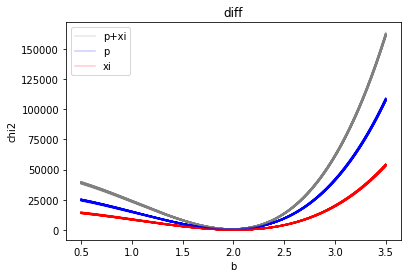

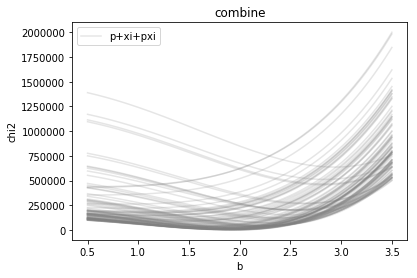

In [14]:
mocks2 = np.hstack((p_mock, xi_mock2))
bestfit_b_diff2 = getting_sigma_bs_diff( cosmo2, b = bbin, covp = covp_model, covxi = covxi_model, 
                          datavsp = datav_p, datavsxi = datav_xi, 
                          mockdatavsp = p_mock, mockdatavsxi = xi_mock2, kmin=kmin, kmax=kmax, rmin=rmin, rmax=rmax )
bestfit_b_com2 = getting_sigma_bs_com( cosmo2, b = bbin, cov = covtot_model, 
                                     datavs = datav_com, mockdatavs = mocks2,
                                    kmin = kmin, kmax = kmax, rmin=rmin, rmax=rmax)

In [15]:
# print out results-------------------------------
sigma_cm2, sigma_dm2 = np.std(bestfit_b_com2[0]), np.std(bestfit_b_diff2[0])
print '---------------------------------\
\n Error on bias (Uncorrelated Mock) \n sigma_combin : {} \n sigma_diff   : {} \
\n---------------------------------'.format(sigma_cm2, sigma_dm2)

---------------------------------
 Error on bias (Uncorrelated Mock) 
 sigma_combin : 0.508377738192 
 sigma_diff   : 0.00486591105548 
---------------------------------


#### Obtain cross bias from bestfit b_p and b_xi

In [16]:
combine_sigmab(bestfit_b_p, bestfit_b_xi)

cov matrix = 
 |0.0000374033   -0.0005239067| 
 |-0.0005239067   0.0000725793|

sigma_p       : 0.006115820875646229
sigma_xi      : 0.008519345661117466
sigma_combin  : nan
sigma_diff    : 0.0049682011646517265


../mock_test.py:524: RuntimeWarning: invalid value encountered in sqrt
  sig_com = np.sqrt(1./np.sum(F))


#### Check outliers 


bestfit b exists between b=[1.43993993994, 1.44594594595]
bestfit b exists between b=[1.51501501502, 1.52102102102]



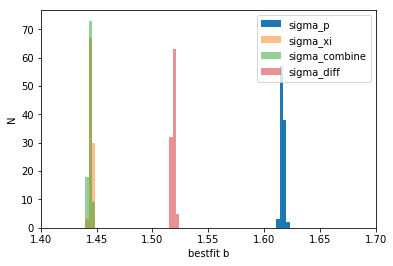

In [127]:
bhist_bin = np.linspace(0.5, 3.5, 1000)
fig, ax = plt.subplots()
_, _, _ = ax.hist( bestfit_b_p, bins = bhist_bin, label = 'sigma_p' )
_, _, _ = ax.hist( bestfit_b_xi, bins = bhist_bin, label = 'sigma_xi', alpha=0.5 )
Nb, _, _ = ax.hist( bestfit_b_com, bins = bhist_bin, label = 'sigma_combine' ,alpha=0.5)
Nb2, _, _ = ax.hist( bestfit_b_diff, bins = bhist_bin, label = 'sigma_diff', alpha = 0.5 )
ax.set_xlabel('bestfit b')
ax.set_ylabel('N');
#ax.set_xlim(1.9, 2.1)
ax.set_xlim(1.4, 1.7)
ax.legend()

nonzero = bhist_bin[:-1][ Nb > 0.0]
nonzero2= bhist_bin[:-1][ Nb2 > 0.0]
print '\nbestfit b exists between b=[{}, {}]'.format(nonzero.min(), nonzero.max() )
print 'bestfit b exists between b=[{}, {}]\n'.format(nonzero2.min(), nonzero2.max() )

#### Chi2 distribution test

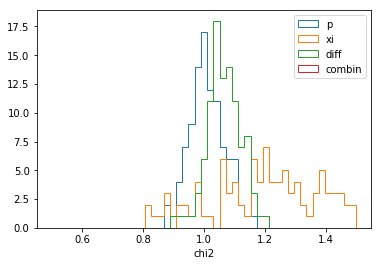

In [18]:
chibin = np.linspace(0.5, 1.5, 50)
fig, ax = plt.subplots()
#ax.plot( np.arange(len(chi2p) ), chi2p)
ax.hist(chi2p, bins = chibin, label='p', histtype='step');
ax.hist(chi2x, bins = chibin, label ='xi', histtype='step');
ax.hist(chi2_diff, bins = chibin, label='diff', histtype='step');
ax.hist(chi2_com, bins = chibin, label='combin', histtype='step');
ax.set_xlabel('chi2')
ax.legend()

In [19]:
print '* with SHOT Noise'

# print out results-------------------------------
print '---------------------------------\
\n#1 Error on bias (Theory) \n sigma_p      : {} \n sigma_xi     : {} \n sigma_combin : {} \n sigma_diff   : {} \
\n---------------------------------'.format(sigma_p, sigma_x, sigma_c, sigma_d)

# print out results-------------------------------
sigma_pm, sigma_xm, sigma_cm, sigma_dm \
= np.std(bestfit_b_p), np.std(bestfit_b_xi), np.std(bestfit_b_com), np.std(bestfit_b_diff)
print '---------------------------------\
\n#2 Error on bias (Mock) \n sigma_p      : {} \n sigma_xi     : {} \n sigma_combin : {} \n sigma_diff   : {} \
\n'.format(sigma_pm, sigma_xm, sigma_cm, sigma_dm)

# print out results-------------------------------
sigma_cm2, sigma_dm2 = np.std(bestfit_b_com2[0]), np.std(bestfit_b_diff2[0])
print ' (Uncorrelated Mock) \n sigma_combin : {} \n sigma_diff   : {} \
\n---------------------------------'.format(sigma_cm2, sigma_dm2)

print '---------------------------------\n\
#3 Error on bias \n \
(Mock, cross bias is obtained \n from bestfit bias of P and Xi)\n'
combine_sigmab(bestfit_b_p, bestfit_b_xi)

* with SHOT Noise
---------------------------------
#1 Error on bias (Theory) 
 sigma_p      : 0.00637045076144 
 sigma_xi     : 0.00844336414134 
 sigma_combin : 0.0027158689336 
 sigma_diff   : 0.00508537473917 
---------------------------------
---------------------------------
#2 Error on bias (Mock) 
 sigma_p      : 0.00611582087565 
 sigma_xi     : 0.00851934566112 
 sigma_combin : 0.00245030306972 
 sigma_diff   : 0.00637729485262 

 (Uncorrelated Mock) 
 sigma_combin : 0.508377738192 
 sigma_diff   : 0.00486591105548 
---------------------------------
---------------------------------
#3 Error on bias 
 (Mock, cross bias is obtained 
 from bestfit bias of P and Xi)

cov matrix = 
 |0.0000374033   -0.0005239067| 
 |-0.0005239067   0.0000725793|

sigma_p       : 0.006115820875646229
sigma_xi      : 0.008519345661117466
sigma_combin  : nan
sigma_diff    : 0.0049682011646517265


-------------------

==========

In [20]:
def mock_covariance_xib(xi_model, xi_mock, bestfit_b, b_model):
    #m1, m2 = np.mgrid[0:1, 0:xi_model.size]
    mock_covbxi = np.zeros(( 1, xi_model.size ))
    for i in range(len(xi_mock)) :
        #p = p_mock[i]
        b = bestfit_b[i]
        x = xi_mock[i]
        mock_covbxi += ( b - b_model) * (x - xi_model)
        print '{}/{}                \r'.format(i+1, len(bestfit_b)),
    mock_covbxi = 1./( len(bestfit_b) - 1 ) * mock_covbxi
    
    #if p_model.size == xi_model.size : mock_covpxi = (mock_covpxi + mock_covpxi.T)/2.
    return mock_covbxi


def mock_covariance_pb(p_model, p_mock, bestfit_b, b_model):
    #m1, m2 = np.mgrid[0:1, 0:xi_model.size]
    mock_covbxi = np.zeros(( 1, p_model.size ))
    for i in range(len(p_mock)) :
        #p = p_mock[i]
        b = bestfit_b[i]
        p = p_mock[i]
        mock_covbxi += ( b - b_model) * (p - p_model)
        print '{}/{}                \r'.format(i+1, len(bestfit_b)),
    mock_covbxi = 1./( len(bestfit_b) - 1 ) * mock_covbxi
    
    #if p_model.size == xi_model.size : mock_covpxi = (mock_covpxi + mock_covpxi.T)/2.
    return mock_covbxi

In [29]:
#kmin = 0.001
#kmax = 0.06
#rmin = 20
#rmax = 200

idx_kmin = get_closest_index_in_data( kmin, cosmo.kbin )   
idx_kmax = get_closest_index_in_data( kmax, cosmo.kbin )

idx_rmin = get_closest_index_in_data( rmin, cosmo.rmin )   
idx_rmax = get_closest_index_in_data( rmax, cosmo.rmax )

rbin = cosmo.rcenter[idx_rmax:idx_rmin]
kbin = cosmo.kcenter[idx_kmin:idx_kmax]

sigma_d = getting_sigma_bs_diff_theory( cosmo2, b = bbin, covp = covp_model, covxi = covxi_model, 
                          datavsp = datav_p, datavsxi = datav_xi, 
                          mockdatavsp = p_mock, mockdatavsxi = xi_mock, kmin=kmin, kmax=kmax, rmin=rmin, rmax=rmax )
sigma_c = getting_sigma_bs_com_theory( cosmo2, b = bbin, cov = covtot_model, 
                                     datavs = datav_com, mockdatavs = mocks,
                                    kmin = kmin, kmax = kmax, rmin=rmin, rmax=rmax)

# print out results-------------------------------
print '---------------------------------\
\n Error on bias (Theory) \n sigma_combin : {} \n sigma_diff   : {} \
\n---------------------------------'.format(sigma_c, sigma_d)

Nk  601  kmin 600  kmax 1200
Nr  80  rmin 89  rmax 10
 theory : 0.005085374739174752
N  681  kmin 600  kmax 1200  rmin 89  rmax 10
 theory : 0.0027158689336035003
---------------------------------
 Error on bias (Theory) 
 sigma_combin : 0.0027158689336 
 sigma_diff   : 0.00508537473917 
---------------------------------


In [22]:
Fpp = np.linalg.inv(covp_model[idx_kmin:idx_kmax, idx_kmin:idx_kmax])
Fpb = np.dot(Fpp, dpdb[idx_kmin:idx_kmax])
Cxib = np.dot( covpxi_model[idx_kmin:idx_kmax,idx_rmax:idx_rmin].T, Fpb )  
final = np.dot( np.linalg.inv(covxi_model[idx_rmax:idx_rmin, idx_rmax:idx_rmin]), Cxib)
#mock_covbxi = mock_covariance_xib(xi_model, xi_mock, bestfit_b_p, 2.0)
#final_mock = np.dot(mock_covbxi[:,idx_rmax:idx_rmin], np.linalg.inv(mock_covxi[idx_rmax:idx_rmin, idx_rmax:idx_rmin]) )


In [23]:
#bestfit_b_p, chi2p = getting_sigma_bs( cosmo2, b = bbin, cov = covp_model, datavs = datav_p, 
#                                     mockdatavs = p_mock, p=True, kmin=kmin, kmax=kmax )
#bestfit_b_xi, chi2x = getting_sigma_bs( cosmo2, b = bbin, cov = covxi_model, datavs = datav_xi, 
#                                     mockdatavs = xi_mock, rmin = rmin, rmax=rmax )
#sigma_pm = np.std(bestfit_b_p)
#sigma_xm = np.std(bestfit_b_xi)

In [24]:
covdiag = covxi_model[idx_rmax:idx_rmin,idx_rmax:idx_rmin ].diagonal()
DAT = np.column_stack((rbin, Cxib, covdiag, final))
header = 'rbin, cxib, cxi_diag, final, final_mock \n# kmin {} kmax {} rmin {} rmax{}'.format(kmin, kmax, rmin, rmax)
filename = '../data_txt/chris/cov_test_k{:0.2f}_{:0.2f}.txt'.format(kmin, kmax)
np.savetxt(filename, DAT, header=header)

In [25]:
#Fxi = np.linalg.inv(covxi_model[idx_rmax:idx_rmin, idx_rmax:idx_rmin])
#Fxib = np.dot(Fxi, dxdb[idx_rmax:idx_rmin])
#Cpb = np.dot( covpxi_model[idx_kmin:idx_kmax,idx_rmax:idx_rmin], Fxib )  
#final_p = np.dot( np.linalg.inv(covp_model[idx_kmin:idx_kmax, idx_kmin:idx_kmax]), Cpb)
#mock_covbp = mock_covariance_pb(p_model, p_mock, bestfit_b_xi, 2.0)
#final_mock_p = np.dot(mock_covbp[:,idx_kmin:idx_kmax], np.linalg.inv(mock_covp[idx_kmin:idx_kmax, idx_kmin:idx_kmax]) )

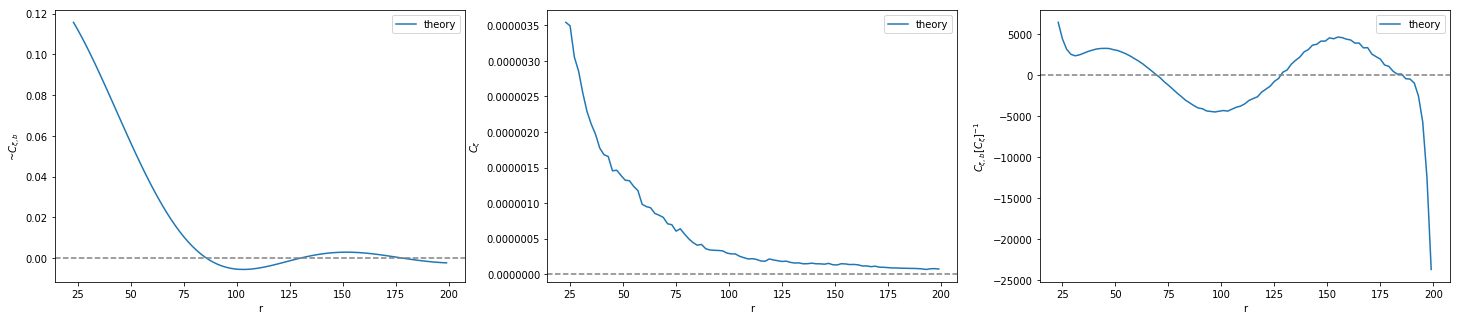

In [26]:
fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize = (25,5))
ax.plot( rbin,Cxib, label = 'theory')
#ax.plot( rbin,mock_covbxi[:,idx_rmax:idx_rmin].ravel()*5e03, label='mock x 5000')
ax.axhline(y=0, linestyle='--', color='grey')
ax.set_xlabel('r')
ax.set_ylabel(r'~$C_{\xi,b}$')
ax.legend()
#ax.set_ylim(-50000,50000)



ax2.plot( rbin,mock_covxi[idx_rmax:idx_rmin,idx_rmax:idx_rmin ].diagonal(), label='theory')
#ax2.plot( rbin,covxi_model[idx_rmax:idx_rmin,idx_rmax:idx_rmin ].diagonal(), label='mock x 5000')
#ax.plot( cosmo.rcenter, final_mock.ravel())

#ax.plot( cosmo.rcenter, Cxib)
#ax.plot( cosmo.rcenter, mock_covbxi.ravel())
ax2.axhline(y=0, linestyle='--', color='grey')
ax2.set_xlabel('r')
ax2.set_ylabel(r'$C_{\xi}$')
#ax.set_ylim(-50000,50000)
ax2.legend()


ax3.plot( rbin, final, label='theory')
#ax3.plot( rbin, final_mock.ravel()*5e03, label='mock x 5000')
#ax.plot( cosmo.rcenter, Cxib)
#ax.plot( cosmo.rcenter, mock_covbxi.ravel())
ax3.axhline(y=0, linestyle='--', color='grey')
ax3.set_xlabel('r')
ax3.set_ylabel(r'$C_{\xi,b} [C_{\xi}]^{-1}$')
#ax3.set_ylim(-50000,50000)
ax3.legend()

In [27]:
fig, ax = plt.subplots()
ax.plot( kbin,Cpb)
ax.plot( kbin,mock_covbp[:,idx_kmin:idx_kmax].ravel())
ax.axhline(y=0, linestyle='--', color='grey')
ax.set_xlabel('k')
ax.set_ylabel(r'~$C_{p,b}$')
#ax.set_ylim(-50000,50000)


fig, ax = plt.subplots()
ax.plot( kbin,mock_covp[idx_kmin:idx_kmax,idx_kmin:idx_kmax ].diagonal())
ax.plot( kbin,covp_model[idx_kmin:idx_kmax,idx_kmin:idx_kmax ].diagonal())
#ax.plot( cosmo.rcenter, final_mock.ravel())

#ax.plot( cosmo.rcenter, Cxib)
#ax.plot( cosmo.rcenter, mock_covbxi.ravel())
ax.axhline(y=0, linestyle='--', color='grey')
ax.set_xlabel('k')
ax.set_ylabel(k'$C_{p}$')
#ax.set_ylim(-50000,50000)


fig, ax = plt.subplots()
ax.plot( kbin, final_p)
ax.plot( kbin, final_mock_p.ravel())

#ax.plot( cosmo.rcenter, Cxib)
#ax.plot( cosmo.rcenter, mock_covbxi.ravel())
ax.axhline(y=0, linestyle='--', color='grey')
ax.set_xlabel('k')
ax.set_ylabel(r'$C_{p,b} [C_{p}]^{-1}$')
#ax.set_ylim(-50000,50000)

SyntaxError: invalid syntax (<ipython-input-27-9cb2aefddbd9>, line 19)